# Projeto de Modelo PyTorch para Classificação de Quatro Classes

### Objetivo:
Desenvolver um modelo de classificação de imagens utilizando a biblioteca PyTorch que seja capaz de distinguir entre quatro classes diferentes de objetos.

#### Subobjetivos:

- Pré-processamento de Dados:
Carregar e organizar o conjunto de dados contendo imagens das quatro classes.
Aplicar transformações de pré-processamento, como redimensionamento, normalização e aumento de dados (data augmentation).

- Construção do Modelo:
Projetar a arquitetura do modelo de classificação usando camadas convolucionais.
Adicionar camadas de ativação apropriadas.
Definir uma camada de saída com quatro neurônios, representando as quatro classes possíveis.

- Treinamento e Validação:
Dividir o conjunto de dados em conjuntos de treinamento, validação e teste.
Implementar o ciclo de treinamento com o uso do otimizador e função de perda apropriados.
Acompanhar as métricas de desempenho, como acurácia e perda, na validação durante o treinamento.

- Avaliação do Modelo:
Avaliar o modelo treinado no conjunto de teste para medir seu desempenho real.
Calcular métricas como acurácia, matriz de confusão e, se necessário, curvas ROC ou precisão-recall.

- Ajuste e Otimização:
Realizar ajustes na arquitetura do modelo e hiperparâmetros para melhorar o desempenho, se necessário.
Explorar técnicas como regularização, dropout e otimização do otimizador para evitar overfitting.

#### Resumo:
Este projeto tem como objetivo criar um modelo de classificação de imagens utilizando a biblioteca PyTorch para distinguir quatro classes diferentes. O processo envolve o pré-processamento dos dados, a construção da arquitetura do modelo, o treinamento e validação, a avaliação do desempenho do modelo e, se necessário, ajustes para otimização.

#### Dificuldades Potenciais:

- Tamanho e Qualidade do Conjunto de Dados:

Qualidade variável das imagens afetou o desempenho do modelo, as imagens estavam em 32X32.

- Seleção da Arquitetura do Modelo:

Escolher a arquitetura correta do modelo, incluindo o número de camadas e neurônios em cada camada, é uma tarefa crítica.
Modelos muito complexos podem levar ao overfitting, enquanto modelos muito simples podem não capturar padrões complexos.

- Sintonia de Hiperparâmetros:

Encontrar os valores ideais para hiperparâmetros como taxa de aprendizado, tamanho do lote e número de épocas é crucial para um bom desempenho.

- Overfitting:

É comum que modelos de deep learning overfitem os dados de treinamento, levando a uma performance ruim em dados não vistos. A aplicação de técnicas de regularização e data augmentation pode ajudar a mitigar esse problema.

- Tempo de Treinamento:

Treinar modelos de deep learning pode ser computacionalmente intensivo e demorado, especialmente se a arquitetura for complexa ou o conjunto de dados for grande, nesse caso foi considerado rápido.

- Debugging e Análise de Desempenho:

Identificar problemas no modelo, como convergência lenta ou baixa acurácia, requer análise cuidadosa e ajustes iterativos.

## Projeto:

In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
!pip install plotly

In [2]:
# Carregando dados e separando em treino e teste
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


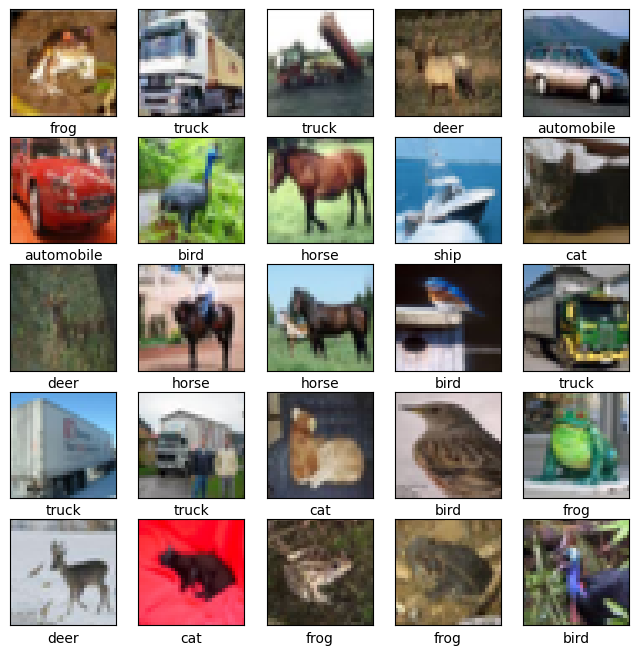

In [3]:
# Verificando algumas imagens baixadas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Carregar a base de dados CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Classes que deseja excluir
classes_to_exclude = [2, 3, 4, 5, 6, 7]  # Classes: 'bird', 'cat', 'deer', 'dog', 'frog', 'horse'

# Criar máscaras booleanas para filtrar as classes
train_mask = ~np.isin(train_labels, classes_to_exclude)
test_mask = ~np.isin(test_labels, classes_to_exclude)

# Aplicar as máscaras para filtrar os dados
filtered_train_images = train_images[train_mask[:, 0]]
filtered_train_labels = train_labels[train_mask[:, 0]]
filtered_test_images = test_images[test_mask[:, 0]]
filtered_test_labels = test_labels[test_mask[:, 0]]

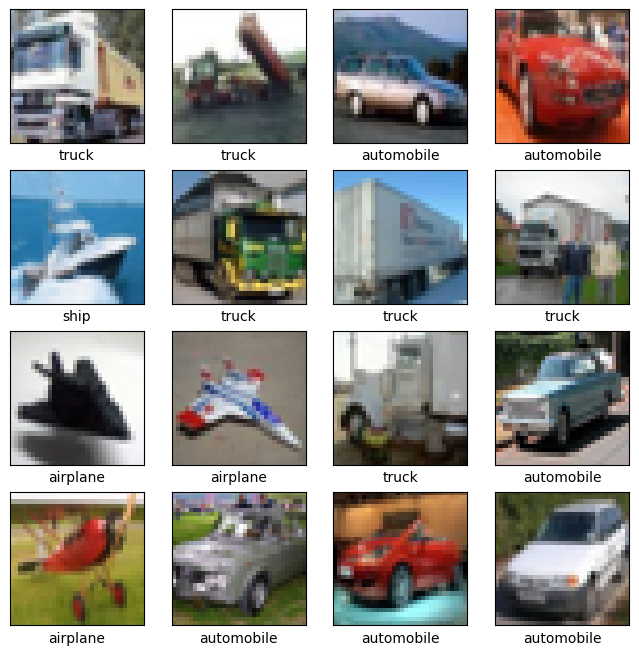

In [5]:
# Mapeamento das novas classes
class_mapping = {0: 'airplane', 1: 'automobile', 8: 'ship', 9: 'truck'}

plt.figure(figsize=(8, 8))
for i in range(16):  # Plota 16 imagens das classes filtradas
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(filtered_train_images[i])
    plt.xlabel(class_mapping[filtered_train_labels[i][0]])
plt.show()


In [6]:
# Carregar a base de dados CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Classes que você deseja manter
classes_to_keep = [0, 1, 8, 9]  # Classes: 'airplane', 'automobile', 'ship', 'truck'

# Criar máscaras booleanas para manter as classes
train_mask = np.isin(train_labels, classes_to_keep)
test_mask = np.isin(test_labels, classes_to_keep)

# Aplicar as máscaras para manter os dados
filtered_train_images = train_images[train_mask[:, 0]]
filtered_train_labels = train_labels[train_mask[:, 0]]
filtered_test_images = test_images[test_mask[:, 0]]
filtered_test_labels = test_labels[test_mask[:, 0]]

# Redefinir rótulos para um intervalo de 0 a 3
label_mapping = {0: 0, 1: 1, 8: 2, 9: 3}
filtered_train_labels = np.array([label_mapping[int(label)] for label in filtered_train_labels])
filtered_test_labels = np.array([label_mapping[int(label)] for label in filtered_test_labels])

print("Classes únicas nos rótulos de treinamento:", np.unique(filtered_train_labels))
print("Classes únicas nos rótulos de teste:", np.unique(filtered_test_labels))

Classes únicas nos rótulos de treinamento: [0 1 2 3]
Classes únicas nos rótulos de teste: [0 1 2 3]


In [7]:
# Normalizar os valores dos pixels para estar entre 0 e 1
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

# Define a transformação para normalização
# Aqui, estamos normalizando os valores dos pixels para ter média 0 e desvio padrão 1
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# Transformações para os conjuntos de treinamento e teste
train_transform = transforms.Compose([transforms.ToTensor(), normalize])
test_transform = transforms.Compose([transforms.ToTensor(), normalize])

# Aplicar as transformações para criar os conjuntos de dados
train_dataset = TensorDataset(torch.Tensor(filtered_train_images).permute(0, 3, 1, 2), torch.Tensor(filtered_train_labels).squeeze().long())
test_dataset = TensorDataset(torch.Tensor(filtered_test_images).permute(0, 3, 1, 2), torch.Tensor(filtered_test_labels).squeeze().long())

# Criar DataLoader para os conjuntos de treinamento e teste
batch_size = 64 # tamanho do lote
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
# Movendo os dados para a GPU se disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modelo

In [9]:
# Criando modelo
class ComplexCNN(nn.Module):
    def __init__(self, num_classes):
        super(ComplexCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Achatando para entrada da camada totalmente conectada
        x = self.fc_layers(x)
        return x

# Definir o número de classes
num_classes = 4  # 'airplane', 'automobile', 'ship', 'truck'

# Criar uma instância do modelo
model = ComplexCNN(num_classes)

# Mover o modelo para a GPU:
model = model.to(device)

# Imprimir o resumo do modelo
print(model)

ComplexCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=4096, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=4, bias=True)
  )
)


In [10]:
# Números de épocas de treinamento
epocas = 50

In [11]:
import torch.optim as optim
import time

# Definir o otimizador (por exemplo, Adam)
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Definir a função de perda
criterion = nn.CrossEntropyLoss()

# Definir o número de épocas de treinamento
num_epochs = epocas

# Listas para armazenar as métricas de Loss e Accuracy
loss_history = []
accuracy_history = []

# Colocar o modelo em modo de treinamento
model.train()

# Iniciar contagem do tempo total de treinamento
start_time = time.time()

# Loop de treinamento
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_loader:
        # Mover dados para a GPU
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # Zerar os gradientes acumulados
        outputs = model(images)  # Passar as imagens pelo modelo
        loss = criterion(outputs, labels)  # Calcular a perda
        loss.backward()  # Retropropagação
        optimizer.step()  # Atualizar os pesos do modelo
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_samples
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    # Ao final de cada época, adicione as métricas à lista de histórico
    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.4f} - Time: {epoch_duration:.2f} seconds")

# Calcular e imprimir o tempo total de treinamento
total_training_time = time.time() - start_time
print(f"Total training time: {total_training_time:.2f} seconds")

print("Completed training")

Epoch [1/50] - Loss: 1.1097 - Accuracy: 0.5005 - Time: 12.46 seconds
Epoch [2/50] - Loss: 0.7224 - Accuracy: 0.7165 - Time: 3.04 seconds
Epoch [3/50] - Loss: 0.5555 - Accuracy: 0.7901 - Time: 3.10 seconds
Epoch [4/50] - Loss: 0.4582 - Accuracy: 0.8276 - Time: 3.11 seconds
Epoch [5/50] - Loss: 0.3863 - Accuracy: 0.8584 - Time: 3.06 seconds
Epoch [6/50] - Loss: 0.3399 - Accuracy: 0.8730 - Time: 3.06 seconds
Epoch [7/50] - Loss: 0.3060 - Accuracy: 0.8879 - Time: 3.10 seconds
Epoch [8/50] - Loss: 0.2763 - Accuracy: 0.9022 - Time: 3.12 seconds
Epoch [9/50] - Loss: 0.2518 - Accuracy: 0.9074 - Time: 3.06 seconds
Epoch [10/50] - Loss: 0.2285 - Accuracy: 0.9174 - Time: 3.06 seconds
Epoch [11/50] - Loss: 0.2087 - Accuracy: 0.9256 - Time: 3.12 seconds
Epoch [12/50] - Loss: 0.1893 - Accuracy: 0.9301 - Time: 3.12 seconds
Epoch [13/50] - Loss: 0.1786 - Accuracy: 0.9356 - Time: 3.07 seconds
Epoch [14/50] - Loss: 0.1775 - Accuracy: 0.9367 - Time: 3.08 seconds
Epoch [15/50] - Loss: 0.1788 - Accuracy: 0

In [12]:
import plotly.express as px
# Plotar gráfico de Loss
loss_fig = px.line(x=list(range(1, num_epochs+1)), y=loss_history, title="Loss Over Epochs")
loss_fig.update_xaxes(title="Epoch")
loss_fig.update_yaxes(title="Loss")
loss_fig.show()

# Plotar gráfico de Accuracy
accuracy_fig = px.line(x=list(range(1, num_epochs+1)), y=accuracy_history, title="Accuracy Over Epochs")
accuracy_fig.update_xaxes(title="Epoch")
accuracy_fig.update_yaxes(title="Accuracy")
accuracy_fig.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Coloque o modelo em modo de avaliação
model.eval()

# Lista para armazenar as previsões do modelo
all_predictions = []

# Loop de avaliação
for images, labels in test_loader:
    # Mover dados para a GPU (se estiver usando GPU)
    images = images.to(device)
    labels = labels.to(device)

    # Obter as previsões do modelo
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())  # Mover as previsões para a CPU

# Converter as previsões para um array numpy
all_predictions = np.array(all_predictions)

# Calcular métricas de avaliação
accuracy = accuracy_score(filtered_test_labels, all_predictions)
precision = precision_score(filtered_test_labels, all_predictions, average='weighted')
recall = recall_score(filtered_test_labels, all_predictions, average='weighted')
f1 = f1_score(filtered_test_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(filtered_test_labels, all_predictions)

# Imprimir as métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Gerar o relatório de classificação
class_names = ['airplane', 'automobile', 'ship', 'truck']
class_report = classification_report(filtered_test_labels, all_predictions, target_names=class_names)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8658
Precision: 0.8669
Recall: 0.8658
F1-score: 0.8656

Confusion Matrix:
[[852  24 102  22]
 [ 22 889  28  61]
 [ 59  28 898  15]
 [ 42  87  47 824]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.85      0.86      1000
  automobile       0.86      0.89      0.88      1000
        ship       0.84      0.90      0.87      1000
       truck       0.89      0.82      0.86      1000

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



Accuracy (Acurácia): A acurácia é a proporção de exemplos classificados corretamente em relação ao total de exemplos. A acurácia é de aproximadamente 86%, o que significa que o modelo classificou corretamente 86% das amostras de teste.

Precision (Precisão): A precisão é a proporção de exemplos classificados como positivos corretamente em relação ao total de exemplos classificados como positivos pelo modelo. Uma precisão de 0.86 indica que, quando o modelo prevê uma classe específica, essa previsão está correta em cerca de 86% das vezes.

Recall (Recall ou Sensibilidade): O recall é a proporção de exemplos classificados corretamente como positivos em relação ao total de exemplos reais que são positivos. Um recall de 0.86 indica que o modelo identificou corretamente cerca de 86% das amostras que realmente pertencem à classe.

F1-score: O F1-score é uma medida combinada de precisão e recall. Ele fornece uma média harmônica entre essas duas métricas. Um F1-score de 0.86 indica um bom equilíbrio entre precisão e recall para o modelo.

Confusion Matrix (Matriz de Confusão): A matriz de confusão mostra o número de previsões corretas e incorretas feitas pelo modelo para cada classe. Cada linha representa as instâncias da classe real, enquanto cada coluna representa as instâncias da classe prevista. Essa matriz fornece uma visão detalhada do desempenho do modelo para cada classe individualmente.

O relatório de classificação também é muito útil para analisar o desempenho do modelo em cada classe individual. Ele fornece métricas como precisão, recall e F1-score para cada classe, permitindo identificar classes em que o modelo pode estar tendo mais dificuldade.

# Previsões

In [14]:
# Previsão de avião
def previsao(url, tipo, model, altura, largura):
  print(f'Previsão de {tipo}')
  from IPython.display import Image, display
  import base64
  image_base64 = url
  image_data = base64.b64decode(image_base64.split(',')[1])
  with open(f'{tipo}.jpg', 'wb') as f:
      f.write(image_data)
  display(Image(filename=f'{tipo}.jpg'))

  from PIL import Image
  import torchvision.transforms as transforms

  # Carregar a imagem
  image_path = f'{tipo}.jpg'
  image = Image.open(image_path)

  # Aplicar transformações semelhantes às usadas no treinamento
  transform = transforms.Compose([
      transforms.Resize((altura, largura)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
  ])

  # Aplicar as transformações à imagem
  input_image = transform(image).unsqueeze(0)  # Adicionar dimensão do lote
  input_image = input_image.to(device)

  # Fazer a previsão usando o modelo:
  model.eval()  # Colocar o modelo em modo de avaliação
  with torch.no_grad():
      outputs = model(input_image)

  # Obter as previsões
  _, predicted_class = torch.max(outputs, 1)

  # Mapear o rótulo da classe de volta para a classe original usando o dicionário de mapeamento
  class_mapping = {0: 'airplane', 1: 'automobile', 2: 'ship', 3: 'truck'}
  predicted_label = class_mapping[predicted_class.item()]

  print(f"A previsão do modelo de {tipo} é: {predicted_label}")
  print('')
  import torch.nn.functional as F

  # Aplicar a função de ativação Softmax nas saídas do modelo
  probabilities = F.softmax(outputs, dim=1)

  # Obter as probabilidades como uma lista
  probabilities_list = probabilities.squeeze().tolist()

  # Exibir as probabilidades para cada classe
  for class_idx, prob in enumerate(probabilities_list):
      class_name = class_mapping[class_idx]
      print(f"Probabilidade de ser {class_name}: {prob:.2%}")

Previsão de AVIÃO


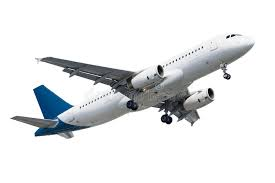

A previsão do modelo de AVIÃO é: ship

Probabilidade de ser airplane: 22.91%
Probabilidade de ser automobile: 16.45%
Probabilidade de ser ship: 33.43%
Probabilidade de ser truck: 27.21%


In [15]:
url1 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEhISEhUVFxcSFxgSGBgXGhcSFxYWFhcVFhYYHiggGBslHRUVITEhJSktLi4uFx8zODMtNygtLisBCgoKDg0OFxAQGi0lHR0tLS01LS0tLS0tLjctLS0tLS0tLS0tLS0tLS0tKy0tLS0tLTUtMC03LS01Ky0tLS0tK//AABEIALcBEwMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQYDBAcIAQL/xABAEAACAQIDBQUFBAgGAwEAAAABAgADEQQSIQUGMUFREyJhcYEHMkKRoSNScrEUM2KCksHR8CRDc6Lh8YOTshX/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIEAwX/xAAfEQEAAwEAAQUBAAAAAAAAAAAAAQIRAyEEEjFBURP/2gAMAwEAAhEDEQA/AO4xEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERARMb1QPGaiY1XLhWBKNkcD4Wyq2U+NmU+sDcaoBMZrGamfU69BbTQ669dbj5T4uIBHEf8APAwIzaG0cea70sPh0FNaTN29Z7K1coezRUXvZQxXM1joGHGZdk4fHKn+IxVN6l7/AGVEKoH3e8btbrp5c5vHEgc5hq7QQfFaVEjSqMAM1mPUC1/S5mVal5XMVvHTXnGxtuHEVclNTlXvMx5Dl6n+vSMNWaIiRSIiAiIgIiICJo7RFUFTTe1yFK2Ug8dQTqD/AElE3kTbZLEFxT4AYbITbrpaoT5CUdJicGTb+PoOf8VWDc1qEm3mlUafKS+D9pOOT31o1R1KkH5obfSMTXYonN8H7Vk/zsK6+NNw30YL+cncH7RNn1NDVamelRGH+4Ar9Yw1a4mjgts4at+qr0angrqT8r3m9IpERAREQEREBERARMb1QJHPtEMwVQX77U2K+7TZUz98n90aX1YeMCResB4yNqbTBYKoZ++aTFOFNgnafaHl8I56uJqHDtUUfpBBzJTD00vkFVTnZlbRiCbDXko6mfuviAvzvppqeZlxGJ6LVVtiCO/TCvSQnLnvdiraMRwHLh4zNUxIF+GuptzPUyKxe0fH0H96yF2htjKCTwH98prE1OYvGC5uzW+6DYepGp+cjsTtmwstgBoLaCV+ttG/5yOxOMPLXwHHjbTrxETMQeU7iNsseJkZidrHreRdI1KrZKYLNfLZdTm6WHPwl23e9nxNnxZsOPZqdT+Jhw8h9Jn3GIPYezK+NfKgIUe854KP5njpOqbH2VTw1MU6Y8STxZupM2MLhkpqEpqFUcAOAmaRrCIiAiIgIiICIiAiIga2NwFKsuWrTSoOjqG+V+Ep+8O4WBFN6y9rQygseyu/DohufQWl5iB5qVgS16gA+HtKZ9czKxI8gG/riKOSMvZspsQyFiDc2sAwDX8CBO6b6bspi6WVKNE1Sy/aP3Sqg3N2AzMNLZed5Xcb7KwyLlxTCoON0BQnoFBBUeZM1rOOXHDjNZjZh8L90/wnWSOG2hiqP6uvXp+CuwH8N7fSTmP3K2nhxYKK9McqZFRbeNJxqf3TK3Vq5CVq0TTbnlzUWH7nuL/64Fgwe/20Kf8AnLUHSoin6qAfrJrCe1SuP1uGpv402ZPoc057UcVBem1ReGlVEItzK1FYFj+4OPGZ6GAZrWtU0vo6Fh/475hb8MDq2D9qOFa2elWp+ICsPmDf6SZwu++AqcMQq/6gZPqwAnB/0hD7tRG/l/flNZ8STcg2UcSdAPWTwr01h9oUagvTq03H7LA/kZ8xG0KaWBYXOgA1JPgOc4DuPhq2LqkUNAlr1GByre/AdbDQHUzsuz6NOgPeLvaxd9WPh+yPAaSKm+3PTL58f+JR/a7tfEUNnu+HqNTfPSBZTYhGcA2PLXKPUzc2jvQiVjRsdaYqK/wk5irL4Ed068c3gZTd5NptWaqr1BVpMvZ9kLBcpAzkPxzXAIPIgcZcTVg9nG2X2jhC2IZnZStJlOgJRs4c21LHQHrlHjLmVPIWnPdyNr0MKnYUkqu7kEgrlyACwz66k68L8Jca217C7EDyiB92izIpY2IHSVnG7UJmPbW8lwVXmCJW62JvzmtxG/iMd4zQq4q8/GFw9Ss2SkjVG6AX/wCpcNj+z5zZsS4UfcTU+RbgPS8zNjFLpq9RsiKzMeAUE/ICWJN1cZRw9SqQi3ALKxBYUwDmbiALXva99OF50nZuyqOHXLSpqnUjifNjqZsYsMUcKFLZWsG4FrGwPhI0rHs3woXCIxU5jpnZVBdBZVtlJ0so6a30lsnH90Np46hj0wi0sWtJmGeniUuApDtUqqyjJSQd0AK2UtoAeI7BLIRESBERAREQEREBERA0dr7YoYVO0xFVaS8sx1J6Ko1Y+ABkJu7v7g8ZVaihdG+DtQF7Tj7liddOBsfrbkvtYwVSltGoXZ3WoBVplyWsh0KC/ABg1gOAtKrSqWsQbEai3Wd/P0lbU3fMvn9fV3pfM8Q9WxORbk+0xky0caSy8BW4svTtB8Q8ePnOs4eurqHRg6sLhlNwQeYI4zl68rc5yzr5dq9I2rJERPJ6kh96NlnE0GpKlFmbug1hcID7zDQ9617ePOSztaYwdbmBRqvssw7Uwpr1hUHFxlyk9OztoPW/jKhvB7NcZh0apSZMQqi9kDZ7X1Ipa3sNbAkzszYmwJ0sOfL5yNr43tQUQFwwQEglR2dS4LI44kLc6dRqJUebq/dVe171jdEsCwvqdeV+JUWHXrM/bq6ZOzYBrBi3wqSBfu34egE6jtfcUVqgsKNBEUorogzPclluoOtgQuYm5y35zn22d3sRhX+1Hdv3aiHutxOjcjYHQ6+EqJbcTa64UVMMGGZj2nqBlYePL6yaxm3D976/ylFXC8GubnhwBJA43Gp01vcacp9wGzqwcMH0VsxzX7zXAtcEWHL6yeYhU7jNotrmYD8XG/4R/O0x4BXqi6jS57zjwv3QLX42FuhuZsVEpuSxRSxNybAKPeNlW1gBpy5QlWoXyhR2drk3vqP2SvnrMxP6sx+J3DYujhUtSBZm1ZjxJsD6DWRmN2rUqcTYTA9MnW+blYfyJ0mP9Htc2I89Ppyl1MYw2tzJrdzYdTFvZVsg9924KPIcW6C/nIFKyk6ajje9v+/+RLRuLvGMPXqI5GRwALcM+unPXgLSDqGydmU8PTWnSUAAAX0uT1Y8zN2QeJ2jiGpk01WmxtlFQHhzLC4yi3XXwn5bGstPvuGYWzEAgcRewJPASqnQZ9nBvYntfFUsdUwlZnZWNQPnJa1dCcxuedw2s7zAREQEREBERAREQEREBERA517a9i9rhFxCjvYdtf8ASqWVvk2Q+QM4gjT1Zj8Ilak9JxdKitTYfssCD+c8tbUwD4etUoP71J2pnxym2YeBFj6z6Po77Wa/j5/rOfmLforSz7o75YjAtZTnpE3akx081Pwt4j1BlTRplBnbNYtGS+fE2pO1+XpTd3ebDY1M1FxmtdqbaOvmvTxGkmZwnc3cvGVmWtmfCINRUNw5HWmoIPqbDXnOxYa6IFNR6hA96oQWPi1gB9J8jvzpS2VnX2PT9L3rt4xu16gkXUx7OD2QzHK9mbRM6N2eVjx45uH3T4TXIBANZu0a1IkcEFSmS2dF5HMb6k+6vSfmttFRznjj3bDUATd2L2ZmUHQKCmQrYe8LZuN/eMwVMbl921h6D0kVidrdJDYzaJPOaxNTeI2prYak6THjdpYalRc1yrrlJqZhmBUDUWPKVSpize4kftUdtTembjMpW/Eg9R68pNg8q/8A/u4apXHZ0noUbOV7Vg1tMvw36cCTx4yapup1Gt+HTjp/KU6tsLF0WVkRa+hACC1uNsynre/P8pf9292sW1GmjUHZh3jmGVQ3IBja9vzktn0sNOmBzufLyI/nFepproBxJtoLW5+Ql82b7Prm9eplH3aRufV20HoJo7x+zimtN6oxlRFQFvtEV+HIBCmp4cJmIVzXa+0FpZWCrVNzlIqIQDYnVVJYdNQPOaT7ZZxd76g2A4E68FHDja5n3bG61fD00r11yGqxCq2jlQpJfL8Ki4FjY3PDnNLaGGamezKstRTYhhYrw0YHhN4jC21GzCmLg6C3na1rHQ8PlOo7nbLoYJRWqEVMQ1yC2vYoeCIOANuLcTcjhOXHBMpDAEuCGtzHAgmW+ltJCoZmsTxGpIPTT85mVheNtb2MKbGgA9QWIB4EAjML3FiRcDxtK/tfHmuozO47wYqhK3AHBiDry08J+t3dlNjahpU3RCozNnvfLe3dAGpnRNh7j4agQ73r1B8VQd0fhTgPW8grns82PVNb9JeiALaVWJUvpYHJbvG2ma4HmZ0uIlCIiAiIgIiICIiAkBvNvQmDHepVqh/ZQhPWoRl9Bc+En58Igc9oe1BfjwzL+GoD9Coknh/aNg295ayeagj/AGMZKbR3Twda+aiqE86fcN+pA0PqDKltP2ZEXOHrD8NUZT/Gmn+2BacPvpgH4YhR+MOn/wBATlvta2alXEpisIVxAqplqdh9oVqJYBmyXtdSo/cM/G0t28bh7mpRfKPiUCotupK3sPO0hKuLUe9lPlpPTl09lth59aReuSg6ez6uYL2bgnkykfmNZ1bcHd/BU0FR1NXErYutYW7InVctM/MMdfLUSmYXFVBqlRqK8Sc5Fh42Mhto7x1P0jtqNSorKAgYm7MBze9736cOE6/6z1jPhyfyrynfl3rGbUAOp185DttzMDY6AlfUfnOXUt+3cBa9LNzJpMVJ815/MSQXeeg4XWpTtwBFvC1lvecs1mPp1xeJ+1zrbQPWalXHSvDb1Am3aj5H+kl8Bs6riLNRp1XU8ypVT43YTEzLXh+auJJ5zXqMZbMDuNWa3aOlIdF77f0+ssmzd1MNRscnaN1qd75Lw+ky059snd/EYj3EIX77aL8+fpeXbZG5VClrV+1bx0UenP1+Us4E+yYMdGgqABVVbC2gtpMkRKEREDgXtK3+xFavUw9IU6dDD1wAWTM71KTsjNdtAMwbu24ceknd1kw+3WxNSqatLFplBHdyU11CZB8Y7pBBselr3lh3u9lODxjVayNUw9eoc2ZCWTtNLu1Im1zbWxHXjN32c7hpstKhNU161YjO9soyrfKqrc/eJJvrfwmtjExyPeDYOKTFjDFc9RSFUprnDDMAo48Dc34fWbFDYppXFX9YCVNzcoQbajl/flO+YbZ9KmzOiKHc5ma3eY+LHW3hwEi969gU8TSdgn2wRsjLa5YA5VN9GF+R68pNMcr3fWth8ZRrU6bOblWVBctSPvedhc+k7iDIPdHYIwtBA3frFRnZtTc8UXoo4eNrydkUiIgIiICIiAiIgIiICIiAiIgcl9se91Wk4wNMmmGQPUYGzOGJAQW1C90368OF78mTA1qx7lJ6h5ZVLfIAT1c2GQtmKKWta5AvbpfpMgE947TFfbEPCeETb3TLy9hdzdoVLZcHiGB55Co6cWt+c3RuNiEIFZRQPSoPyIzAjxE9KzHiMOjjK6qw6MLj6zM9bS1HGsPN9DdpBU7KqzLfh0J8OXradS2H7L9mZFqEVa2YA/aPb0sgHDhLBW3LwjsGZGIBuFzEKDx0tr9ZPUKKooVFCqNAALATE3luKQj9nbuYSh+qw1FCOYQZv4jr9ZKREy0REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERA//9k="
previsao(url1, 'AVIÃO', model,32,32)

Previsão de BARCO


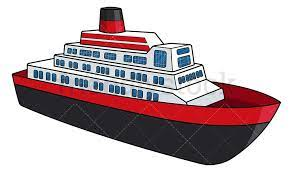

A previsão do modelo de BARCO é: ship

Probabilidade de ser airplane: 19.57%
Probabilidade de ser automobile: 15.36%
Probabilidade de ser ship: 35.33%
Probabilidade de ser truck: 29.74%


In [16]:
url2 ='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxQUExYUFBMUFxMYFxkWGRkZGRkYGxgYGhsYHhkYGRkhIyoiGSIoHxgeIzMkJystMDAwGyE4OzYuOisvMC0BCwsLDw4PHBERHDgoIic7MDI4LTsvMy8vMS8xLS8tLS8tNC8vLTovLy8vMS0zLy8vOi8wLy8vLy8vOC8vLy8vL//AABEIAKwBJQMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAABQIDBAYHAQj/xABKEAACAQMCAgYGBQgIBAcBAAABAgMABBESIQUxBhMiQVFxBzJhgZGhFEJScrEVIzNikqLB0TRDU4KTsuHwJIOj8RZFY3N0wtII/8QAGgEBAAMBAQEAAAAAAAAAAAAAAAECAwQFBv/EADIRAAIBAgQDBQgCAwEAAAAAAAABAgMRBAUhMRJBURMycYGhIkJhkbHB0fAU4TNS8Qb/2gAMAwEAAhEDEQA/AO40pSgFKUoBSlKAUpSgFKUoBSlKAtTTKo1MyqPEkAfE1DTdMeHodLX1qCOY66PI8965v/8A0NJk2cZ3U9e5G+MjqQp/eauSwg49Z/22/nQH1RY9J7OU6Yru2kbwWWNj8Ac1MV8pW1gkkeWDMd+buRnfG2ceFdy9DF71nDI1JJMTyRbnOAGLIPcjqB7MUBvdKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSoe56S2qO0bTx9YuzIDqZTjOCq5IODVhullvnCrdv8ActLph+0IsfOgOX+nvtXNsufVidv2nUf/AErm0Nm2Pq8/E/yrevS1xESXysUkjX6OigSoYySJJSxQN7Cv8a1a3XA+Y8q56tSUXoe5gMDRrwTnvrzL3DYWC4wOfj5eyul+g2UqLuAnk8co/vqUI93VD4iuf2Azke0Vsvo44zFb37K7hUkhcHmTrVo2XYZIGC9IVJSauaY7LqFGjKUN1bn5HcaVAnplYA4a9tlPg8qIfgxFZNr0jtJPUu7Z/uzRt+BroPnyVpVqOdW9VlbyINXaAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpXhNAe0rn0XH+KTqs0UVskEiLLGMGWbQ41LrDSRIrYI5EgZ99VtxG5YZlk4hER/ZW1tJ8k68/DegNFjsuJM0ktu0vVyyyyqI7hVGJJHfOjrBjn4VkG441H33fwEv8ABs1Bv0SKADr7YKoAzcJcWp2HM9bDj51etOCXZ/o8sMn/AMe8iP4ulczjK+z+Z71KtQ4FHii7Jbw+5nzdI+K6SswldDzWa2Ur7wYxUM3FUB0tZ2PjjqTFyHPCOuKlmteMRfV4gPJmmHwVnFW5+k/Eoxh3uVHf1tvgfvxbCq+18flc2SpSeig/BtMtQcbt0/8ALbOQHvIkw2PY7N39xrYuF+ktIRpj4dDEvhEwQfARgVrA6bu2zizl8dcMZPwBFXB0gj+tYWLA96RtH+DHFONrn6EvC0569lfwnf6m8xelyP61tL/dZD+JFXB6SOHyfpLeQffjjb8GNaCeK2ZPa4aB7UuZl+C4Iqs3HDW5wXifckjb/PzqVUl1XqZywFHnTkvBp/c65ZcD4dcxpMtnaujqGUmCPOD3HK5BHIj2VZueHixInto9NuBieCMdnRz6+JBydOZC+upPNlUVC+jvj1okbwJLMFRXnzcdWuhBjXhl7OBnUc+LHymB02DNiO0uyuARLJGIYmB5EM5Dfu10Rd1c8KtTdObi0146O3I2iGZXVWRgysAysDkMCMggjmCO+r1aB0fvZ0MkcMvDUhZ9Ucf0lpmiLZLqFCJ2Se0Ez2csAcYCzFw97GuuS+4eq+LW0ir+0bmrGZs9K1FeNXX1DbzkjYxxXAQ/8wB0HvarC9LLpRI0lpBpiQyyLHdrJMI1GWZYgmCdtgXGfGgN1pVtHBAI3BGR5GrlAKUpQClKUApSlAKUpQClKUApSlAKUpQClKjeI8bggKrLMiuwJVM5dgOZVBlm9woCSpWvnpIWGYbS8l/5XUDzPXmM48gaqNxfv6sNrCvc0krysPONEVfhJQGdxbikVtE007hIk3Zjk8zgAAZJJJAAAyc1CTdMIpYZHt4rmYdWxBSF1B7JIwXC5qxxyyuAIWnug/8AxUHYjhWKM5cAZ1F3257OP4VoK9J4ZFE01javLqOHAEbBdIOA+GbV2uYIzvsKvGLlsUlNR3L/ABi3jnNrFDPbkxQRxaTMqSxkFdTBCQw2C8t+zyqW6NWl4lzNJKswj6qUgGTrEaQyKyFQCQTpDY8AcVk8YNvDCkjS3apLjAEhuMZXV+jnMiAAdwHkKwLXh9uZDDbz23W/WzbtA77ZOmW3aEE4zyBxg7bGrXla1tCnDG976mvr0nvIca7mVCR6skcYJITJyGUkb/his5uksssJMkVrOTIq/nYtQ0mNmcEdkHkMHYYJzWyGwul7CmQDn+au+ucj2x3UTgDP/qe+sW7jfTpkjIQNkrNYdeS3IsGtJSFJG2dH8qlzi94hQktpFPQ+KC461fosELJ1e9uWhBMgbb82QVwU8e/urCh6Twqex+UlUkYYXDy7HODiZyBsM435ipDhHEYrdykQsQzkMVF08czEcvzM0YIHPbV4+2ox+iaqpKx38K9x0RXK4AIAXqHZ2Az377UTg277Bqairbkzwa8F2XCXc8hUKSk8Fq+A2cHKxjPL7VY/E+DwxMOv/I4D5I6y0ELtjmdYm3xkZOO+rfRcW1mZGmvADIEUdfG9tjRqztNg5OflVXTLhkl00UluqToqODodDu2MYOobH2Gq8MHK19C3aTjG/Mxx0UgcaorSzkX7UN/cxj9lUdPnVm66CR91tfD2Q3NtIP8ArBTUNPwW4WJzJbyBDPbjCgnsotx2iO12QXXfGMnxqNtpuq0qsjo3ZGlHIIyx5gFTmrLDRls0WWOrQ2bXmzb+jnQcCfrZFmESY0RzdVreTfLP1bMmgbYGck5yAANVPSjpHcpdvHFPoRDGunQjZ1IHYklGOe1jmOQ9876P7p5LUM8jyESOAzklsDGxJJJ3J5k1pfStWN7c4B9dMnB7oQP4VahTipuNimKxE6kVKTbempN8E6WTyzJFMIpY2KITjDZcbEDODg92OWfCt34BYwpPNpijVtET5CKD2jKOYH6lco6M4+lWyj+0X91Ad/8Af+vXeDri5lP2oYR+y9xn/OKjERjGWhTDylKPtHMOMcI4lcXEyNHcyKJXADEiMrqOkprIiA045VL9CuirQXOmeW2QtFJGIFkDSsGHayvcABnYnlUX054tM11PEZJSqSKoQOyoFKagCi+vsQd996juh0gju7cgKMTqvIZ/OApsOY51s1J0+SVuhinFVNm3fqdi6HTs9jbM/r9RGH++EAf94GpqtU6KcWgQSWzzwidLi4HVmRQ+hp5Hj7BOcaHXura64juFKUoBSlKAUpSgFKUoBSlKAUpSgKaYr2uY+muW4VLbqp5IomaRHCMV1NpVkDEEEjCvtmobsrl6dN1JqK3ZuvGelFpa/p7iNGxnTnU5HsjXLH3CtN4Xf2/Ebu5nia4UJHbxBlklgJwZ2PZVhqXtDZx47ePGDZMvIKc+GxJ9+a3j0XccgtevW4bqzI0ZUsrFTpD5y6gqvMcyKzjVUmd9fL5UqfE7t+GhvP5bMczwrxNusUE6biFHRQq6mw6rEThdzlydj4GpOw47dMqsq2lynIvFK8ZyOeEKuvuMgxXOeJcMkuLyea36uaMrMytFLFJnNu6hdKsW1aiBjFXbWKSLhN0ZEkjJuYzh1ZCVLWynYgHGxHxrr4ItKz6Hjcc03ddToHFuKrLHont76HS6uHjRZiGQgqy9SZTjI+svmK1afgFlLiKO9tteovomjWGYk7HsxNARsO9CNuWa12Xj08VrbFJnXJueRz6rR6Qc5yBqOxyN+Vbh0040YreJtMT62VWEg1IMo7Hs5H2ce+odOUWrPf7EqpGSd1t9yvpN0curiFYzChWMgo0EocsApXBjlEYG2P6yoex4Q8F6lxKk8cYLnS0EjkakZAGeESRD186i45cvCro1dWs0rQx25t8KZFaCZ4clSqsGEWgc22znPfip6biXUzrCvEZlkZdSpNGk0YBzgl9CsM6TsZPxFR7cdP2xPsPX9uaj0lJuLtpLZklUREMYpEaQfm3UoYw2sHO2nTvnv7tu6ArJ9GAlEinrGwJAysF2xs24Gc0a/e5jAZOG3qFtJO8W/PARlmBbHdqFWWht0J1Wl7bELjNvIzx+6GGRsj2NFUuba4WgoJPiRqi9N7nRJqMUg6yMDrIwVCuJiVCrpyPza4zk896leAT209wYhZxQs0QkLwMYXzhCQTHpPNzvnNX5eFWEimMX0CtI2vTdQJDIzAEZ7H0eViAxGSSdzWfYdG5YJzcxwwS5TRmK4ZBg6fVidCB6o/raOUWtiFGSe44jeJbypALy9jZwCO0twuGYqoczLI25B5eHdWOlvFcSsFPDriRM5EtpplGk4JEqsNs43VCNx4isLpHw+Se5huHiuIVTq1ZTA0+ySM5YNAZRuGxvjlzrH6GxrFeytJcW+8bqqiVdZ1SIw/NHDrsu+VHMUtBx31F58W2hPrw6VCW+jyr4fR7+Zs+UMwWJeVUSTSBD1kl8B3Lc2cV0B5i1GSPNq1vphE/5UhZUbcwKrhT9s5Ct7zyqMsekNwJZ2WeT9GzDUxcKxeNcqrZAxrPdUqndXTDq2dmjdoeN9UFjWfhhPcjvJYHfuWJ1kOcnl7axeJ9HevdpTa3GX3Z7ea2ljzp06sOQ/L7K93Ks7oNxaS5t3M7B2WVkBwoyoSM5YABc5YjYDuqEvOL2aXUkb2MIKGQdagQSnq1ZjsFU76CPX8KhRmm+HkTKUGlxcyvhnCYYJ1lkmul6sswWW2njXJXTlpiDGwAOdsb9/dWyWnSuyW4U/TLbBicbTRk6g8WldIOcnU2BjJwajOj13bz6+plvYWTTqVriVgA2rBVWkkTHZPd3cqkZ4p1AZeIXBBeJCTHallV5FQkN1IxgNncHlVZ8V7SJhw2vHYg+k3CUuZZLhVnSFgrO85W0iyoVcl5AZANKj+pIP2hXnBuDJkG2SWU9zW8fUx4Yd97OWkcbntQEc/VrI43xqytJ3Uwvc3UeCJJ2L6WYKTokfV1fZYHEaAd3jUJ0h9IV07ERusUeI5F0gAhWRWVWc5znrFzsOXhnNkpyVuRDcIu/M22fhYji0XVxb20LanMSYmkkIGX1TzhmmOkDJWMNtzq/0JW3ikMNof8Ag5YRNApLnDpI8dxgPuoyYiRtuzeNc4sOA3d2uEjlbTIO1IcBlkAywZyNYBiDHTk/nc43rc+G8PPDBafSJ4A30mRPW04hnTBVS2C356ONztsM+GarKMUt9SYyk3qtDpVeE1bWZT3ird4o0576oaGTSrQcADJxtVSODyOaArpSlAKUpQClKUApSlAUmtJ9L1mX4dI4GWgZZh5KdLn9h3rd6xOK2SzQywt6ssbxnydSp/GjV9CYycZKS3R8sx8UH1kYeWGH8D8qyYruNtg4z4HY/A71DtGykq4w6kqw8GU4YfEGqSM86xlh4vY9ennNePfSl6MnpIlJyVBI3BI3HtB7qkbXjVzHtHczAcsF+tX3JJqUe4VqUbFfVZl8jt8Dt8qyE4hIOelvMYPxG3yrPsake6zrWZYOt/lh6L67m4ydJpHCrPBazqmdIKNCw1Y1YeNgFBwMgLvUhxrpVBdIkc0E0Wlw4MLxyAEBl+uEOMMdgK0dOJj6ysPaO0Plv8qvJcoxGl1z4Zwfgd6lVKsdyXgsurr2HZvo/szfOj1xYRXDzLeYUqyqksTxFQ7KxzK2EbGnG2OfxzON8HlubhJ7cJNCYcF0kjIDL1pAI1ZOdQxgHnviufuNqoES5B0gMMYYbMPJhuKvHGPdr4GFT/z6ekJ/HVEvc2cyRqWglRjJKFyrA50wacZGckg48cHHKuh9M71orZnRmV9ajUOe7cveBz9tc2seN3UWeruZ1B8X6wfCTUBWf/4vuSpjlSC4jOMiSMqTjkdSMAp9umtv5cJNNnBLI8RBPh18H+SZs+l1wPoyNoZZFUuHXOsm4lj93ZQb+Oc55VNcXtbS2Qy/R9JZwn5gm3YsQ7ZLRlTyQ+/HnWnxcctmeJ5bOROqChRDMGBCOXAZXC/WZiTqyc7mpXjvSC1u4VjMskDCRZB1kLsDhJF0s0esL+kznflWiq05NepySweKpp8UX8NCWs+kcaNGUvrqJXXIWVVnUDWydtmRn9ZGGdfIZJFSkfEJZmkic8OvGUkNG2qEgA4IYfnuR25AZ2rnr8L6xoY4Li2lxGEbTNGpBMsrsdLlWKjrO4ZODt3VsXRzh1xHxKaRoJBGTOwYqdBDydnD8myDnY1ZxptXTOZSqJ2kiaFpbo4X8n3FuBvqtJdKZ+5FIrt5GOsS4gs2Zv8AjRGZBoxe26R55EKS6QytuAfXO4BFYXpFvpY5bfTJImVkY6HZM46sDOCM43+JrCtelNz9KiRpA6PJBEylVx2+rRjkAHO5PPn3Y2oqTaun19A6qTs109TbuE8IuLcAW6Wk0TEsTHLLHkt3gN1ueQ5v3CtW4h0Xka4lndLqIMJthCs41So6ggwyO+ka84KA4ArK6W3dtb3Gn6HHkorvLGepk7RYbMgDEgL9oc+7FZ9lxZVn+jx3d9E4cxjUY542YHGkmUSScxjmvnUKNRar9RLlB6P9ZHdCBFayTdfcQa5urCIWZHwmvmkqo4Pb5ae6tzvIesik6s9po2C/ewdJ+OKty3N6NQb6LcxnkrxvCf7zAyA/sCov6PbIS89gbRDu81tKURT9qRojHIB4uU0j6xAqspNu7LRikrIp6S9F7e4nF5NcrDbPCpOdCdrT2XEjHSNiuxU+r7av8PtoAyCzsXnZV0ddMOqjIXkTJINTg7dqJGGBjkBU7wno3bQlJIohJhAI5HdpnCYGAkjliq4AwFIGKnJUOQwG47qq5N6FlFbkDPwq5lGZ7kRr/Z2y6NvstM2XbzQRmsm14FbxY0QoDIAJHYa5JBjlJI2Xk5/WJqSkLPtpIHeTUXxXj8EbdWrGWdMfmogZHHhrA2jBxzcqPbUEkJ0g6HThc8Nu5LYjlCSHgPsQMG6nyUFdvVHOuf33TvjFoxiuQmscuuiHbAxuroVVx7Vz7cGukzcRvZtlVLVD37TTYx4/ooyD/wC6Kh+lPRqOS2nGhppzE5WWVjI6uBldJP6MFlHZQKPZUOLexpSnFP2ldGvW3pjkOlZrRCBzMchU+5WU/wCatn4d6W+HsMOJoPvR6x8Yy/zArhIORkeYr2sVUkey8tpS2bR9Q8K6R2lxtBcwyH7KupYeaesPeKlq+RnQHmAfOp3hHS++t8dVdSBR9Rz1ieWl86R93FWVVcznqZXNdxpn03Xtcc4J6ZXGFu7cN4vCcH/Dc4+D+6uj9H+llpefoJlZ+ZQ5WQeaNhse3GK0Uk9jz6lCpT7ysTtKUqTIUpSgFKUoD5n9KPCuo4nOuMLKROnlL63/AFA9arX1D0r6IW1+gWdDqXOiRDpdM88HkR7GBG3KuS9I/RBdxZa1dbiP7O0coHkTofzBX2CpuDnFKvXcDxOY5EeOQblHUo3npIBx8qtYqQeV4RnnXtKA9jJX1WZfI7fDl8qyEv5BzKsPaMH4jb5VZVcbnl3Dftf6f78glPfuNsjy5fDuqkoRlujop4qtT7smvPT5GanFB9ZGHkQw/gflWTHeofrgHwPZPwOKiHTG43Hj+I+dUmspYeL2PQpZ1Xj3kpej9DYKVr6beqSv3SV/DnWQl5Iv1sn9YDb4YrJ4aXJnoU87pPvxa9SXdQdiAR7d6qtyU/Rs6Z/s2aP/ACEVGpxU/WT3qc/I4/Gry8Qj7yVP6wI+fL51RwqR5HXHF4Ovo2n4/wBkvNxad1CvM0ijkJljnx5GVHPzquPi8gmWcxwNIrh91kXLKQVOEkCDBAOy8xUdHIGGVII9hBqtVzRVqkdmJZdg6ivwry/okOO8Ze5nWaSMKoCBlRy3ZUnOnKgAnPeTV2z48Pp4uJI5Fh695fqsQCWYDSpyTkgfOozXj1Ty7/HwOKEZ3HvH8f8Af/bSOMqJW8jlnkOGk7q657nW4Ondg23XlT+vFKg/aKafnUjbdJbNzhLu3LeAmj1fs5zXEK8YZ57+dSsU+aMJZDH3Z+h2+C0eImSydACSzwEkwSE8yunJgYn6yAqcklWJyMlelEkmpIbR+tQhZOudY0icgNpLLrZzpYMCilSCO0K4KLVM6tCg+IAB9xrJgupEJKTTITjOiWVM45Z0sOVW/kx5owlkVVd2S+h2yWwlm/pFw7j+yhzBF79JMj+BDOVP2RWXaWqRIEiRI0HJUUKo8gNq4rF0hvF9W7nx+s+v/OGq5L0rvypX6ZIAdtkhB9zBAw8wassRAxlkuJXR+f5Ou8X4zb266riZIx3aju33VHabyANaDxz0soMrawlzy6yXKr5iMdph5la51Nw8sxdpXZ29Zn7TN5sdzXv5L0/X7Xd2T2T48+f4fhDrx5GlPJ6i70b+aIxGKgDwGKrExrOHDSRguMdx0ns+Pfyqk8JYc3H7J/nWfHDqehGlXjoov5r8mKJhVYceNX/ySft/un+dejhP659wA/nVXKHU1jCvzh6r8lmvRzBGQQcgjYgjkQRuD7RWfbcLXONT4798fwFSCcKi+xqP6xZvkSRRSXIv2M5KzivN/wDSc6K+lS5tiEuCbmEeJHXKB9lv6zyff9burudhdLLGkqZ0OiuuQVOlgCMg7jY8jXCejPAxc3MduoAjPbm0gACJCNQ2+0SE/vE91d8UY5V0022rs+czClClV4YefRFylKVc4RSlKAUpSgI/i/B4LlOrnhjlTwdQ2D4g81PtFc4496F4W7VpM0J/s5Myp5Bs618yW8q6vSgPmDpB0GvrXJkt2KD+si/Op55A1KPayitejwRnOR3YPM/y/wB+X2BWs9IOgtjdktLbqJD/AFkeY397LjV5NkVNwfMjNk5/0ryurcd9C0q5a0uFkH2Jhob/ABFGk/sjzrnnGuj11a/0i3liH2yMx/4i5T3ZzQEcjY7sjv8A9D3H20dfDkeX8j7apBq4j6fb7N/cfPepBTy86pqp0xuNweR/331TQCvR/v8A1ryvVXP40B4sIJ5AHx8PbnnV4XLDZXcDnuQ2/vB29lUs45Dl4+PhkZ/7VQRVXFPc0jVnB3i2vB2MqPiLjmEb4r89/wAKvpxMd6MPaMMP5/Ko2lZujB8jtp5piYe9fxVybF9E24cDxDdn4asVdQg7g5Hs3qBQkb8qNEp7QUAjmBnYeOazeGXJnbTzya78U/B2J8mvKgRMw5O4/vE/jmrq3so+uD5qP4YrN4aXI7IZ5Rfei18mTQNDUUOJP4Ifiv8AE1fHFCvOMavAOduWDyG/4fhV0J9DeObYZ+9byJDl5/HHn7fw/CisAcUH2H+K/wAxXo4ov2X/AHf51Xsp9DVZjhX76M6qlPcfj4H+I/35x/5UX7L/AAH/AOqflNe5X/d/nTs59CXmGG/3Rnld8UNYQ4uOWh8eJ07fBuWatNxFs4EYz7W8eXJansZ9CjzTCreXoycsl5n3VfkcKCxOABkn2Co5JZQAMxgexST8S2PlW7ei/os9xL9KmZmgibsKQoWWVTzwAMqhHty/3TnaNGXM462dUUnwJt+GhvXo56Om2gLyri4mw7g80UepF/dBJP6zN3YrcKCldCVj5mc3OTlLdntKUqSopSlAKUpQClKUApSlAKpK5GDuKqpQGncc9G3D7jLdQIZDntw/mzk8yVHYY+1lNc+436F50ybaeOZfsSjq3x4ahlWPuWu5UoD5R4twK6tSfpFvLEuwLMuUO/dKupM+/NRrL3jdTyP8POvr4jOx5VqnGvR1w+4yWt1jc7l4SYjnfcheyx3+sDU3B82Iuf5+HtNes22By/E+P+ldW416F5QP+FuVYfYmUox85EyD7BoFaFxnodfW2eutZQo+ug61MeOpM6R97FAQdVDwqhWB5EHy3r2pANegV6B4+7+VeMaAE0BrylAXGGdxz7xt7dwPD8Kt16rY3BwavlcbgdrGSPs8u0Dnn7O78ALY7P3vw58x4/hVuhpQHoNCK8r1aA8FemvT7OXj/CqaAVncKj1Nv6q7j2MeXtxtWEBW6dDOist2/VR9mNSOumxkJnfSvczkch3DBO2AQMrol0YkvpurGVgQjrpB3A7iND3uw/ZB1fZB71ZWiRRpHGoSNFCqo2CqBgAVj8G4VFbQrDCulFG3eSTuWY82Ynck8zUjVQKUpQClKUApSlAKUpQClKUApSlAKUpQClKUApSlAKUpQEDxvofZXWTPbRM5+uBok/xFw3zrROMehWFt7a5kjP2JQJV8gRpYeZLV1mlAfN/F/RjxKHJ6hZlH1oXDbfcbS/uANajcQsjdXIrRyD6simNverAH319fVi3thHMpSaKORDzV1Vx8CMVNwfI9K+heMeibh02SiSW7eMLkD9htSAeQFaZxT0MXCZNvPFL4CUNEw8mXUpPuUUuDmPq/e/y+Yxz/AAqgHFTfFeh99b5620mAH1lXrV89UerHvxUCjg8iD5HNAXmAO494+OSPZ+FW69U45bGqyudx7x3DluN+X4VILYFek91Ca8oD0GhFVQxM7KiKzuxwqKCzMfBVG591dc6C+iQ7TcQA7ituDkezrmHP7i7eJOSKgGqej3oHNfMJW1RWoP6XHafxEIOx8NZ2HtIwO/8ACeGRW8SxQoEjUYAHzJJ3Yk7kncnnWXFGFAVQAoAAAGAAOQA7quVAFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAVD8Y6M2lz/SLaKQ/aZBrHk47Q9xqYpQHM+K+hmzfJgkngPcNXWp8Hy37wrVrz0MXiH8zcW8m/1w8R+ADj513WlAcCX0OcQJGXtFHeeskb3gdUPhmp3hXoSUEG4u2YfZijCfvsWz7gK7BSgIPo90VtLMEW8CoTsznLO3m7ZY+WcVOUpQClKUApSlAKUpQClKUB//2Q=='
previsao(url2, 'BARCO', model,32,32)

Previsão de CARRO


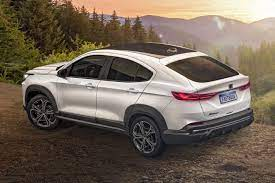

A previsão do modelo de CARRO é: airplane

Probabilidade de ser airplane: 92.82%
Probabilidade de ser automobile: 0.32%
Probabilidade de ser ship: 6.11%
Probabilidade de ser truck: 0.75%


In [17]:
url3='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYYGBgaGhocGhocHB4aHBwcGBwaHBocHhwcIS4lHB4rHxoaJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHhISHjQrJCs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAECBAUGBwj/xABBEAABAgMFBQUFBgUFAAMBAAABAhEAAyEEEjFBUQUiYXGBBjKRobETQsHR8BRSYnLh8QcVgpKyI0NTotIzY8IW/8QAGAEAAwEBAAAAAAAAAAAAAAAAAAECAwT/xAAlEQEBAQEAAgICAgEFAAAAAAAAARECEiEDMUFRE2EEIjJxgfD/2gAMAwEAAhEDEQA/AOQmpukupLk8ARlic3jKtSVlV5SU3BgTdy0z+Ea9rJopAfAnAVOr5RVMhRvOMgS5bwI8Y4+Os+2t/SlZik+6CCaEYgireGUWUzglLAtqAWxzbKIyWSCUqJY1cgvXhDzEBT4DQ8tafVI0t0kZUxQbGuppTMc40L7JvE10pX6fCMyXMIIfAUGQLY5YktF4TwoDB3zp8fOI6i42dlbRWhKghFy9k6i6m943xdapGNcqONWXttAQEMZqrqU94JBIahUT3Q5oxjlFoIZiWxVXTAfHGG+1qWcTu1rXDDPyhfap3Z6bf8yWlQ7yUhTlBLuCEkigAIPTEx6BJtaFpCgWok1/FQY1Z3D8DHkKlMK6xs7O2vcuAgBId2Dm6bpUnjVKTRq5xPXLXj5P29GTaElakA7yACoaXnb0ghLZ/Rwjh7Ftpp99IUUqNKM1SSSm8zMTRwKxv7Q24j2Mtd1W8tBIJAoC6mLh8Dk0R49fiNZ3z+228IKMZ/8AOZBQld8bxTkcyARhiNItotUs++nqW9YXj1+qry5/Y7w4MUNmW72qpgBcJVukDJg+ONc+MXCkxN9D7FBiQMACTrE0oJwIPLhC0WCgxILEVTPQCxmIB0K0j4wdAfAg8iDBtiLIMlQ1iYWNYEJJ+miabPxEHkmyCBYhwuGEsajwETSgfeHgIryRcTB4RNJOkRTLP3h4Q5S3eWBzDRUqKOjwgoMUkzkf8qP7k/OLKCDgoHkQfSNJWdg46ROAunXziSSMXHnFzpFgwhwIGFDUecESYvmwqnChodo1hEwhQmhQyfOSQlWe9rro/M58IqrQo1KDSl1JJGDuwLdYFZp5KmWEpDMd7LHF8XaLCJKVMyiwZhiaHAmo6FsY4f8Ab9tt2KU5F0vVlXaFxQpBVxxIgMoAqIqKHE4HIxb2ipSFOEqNGSpxdoKm6HJONaYxmygu9oT3XLEjPHIVjo5986lcmLDBJvFmriS/Lw6RMIUQ4FwZP3mbNsP1gUpDqBcBwRhng+WsQdZN13SM3LROKXyq8Ah2JO89aDgMOXCKqtxRSC7Z519IKQEoSRQu3LPx+UQnSAlAKalW8o6D4D4wuRTLml8dIIhfD61imhVaZAkvE0Lc4xV5ErWs80NWLtq2sohKCSLpF2obddm3X8zhGLLVgYMsuQG44+sRNn0rWzKtToQhzeC0sXJSwNHqGbhriI17RbEpQQpIUWwKsQTRiEsdW4Z58klbsGOuHhXKCKtJWoqNT8GYU6Rc7sgyVr7MtaUKKiFs5IYhIAOrJf0yjdt21FykJKFrLqFCpwQQTQl+HSOQsqyFOzCmmWkWLZbFLLqJJemlA1AIU79WWafvfTqLPted7IKvKoAGDElhQ4Uz8DGZsy3KmXkqUtRKirO6HxzavLOMqda1eyCEmlbzEh3rg7NENmzSghb5ZEA+bw5eZlwW9ft0pktDiWRFa1WrccHH10g8uYSMX5YRtvN9F7X5NrmpwWvxJ9YtDas/7/8A1T8oy0zDrB0TdYi8c37g8q0kbXnfeB5pHwaLJ22sjupfWp8oykrEESIn+Li/g/KrUy3TF4rPIbo8sYCBDJETSBFTiT6LR7OsAuRF2fZyWWij6UjPBi/LtjIu5jCC8zE23dPK2hNBYqBrmH9IuJ2spJZSafhLeRjHvPWCXozvEU6Sz7SQod5joaGDK2ihOJJOgqfLCOYSYIhTQTmz8leY3Zm1j7qeqvkPnFZdtmH3j0YRSROiap+lYqX9lk/A/wBsX95XjDxT9rwhQ9GPDpZYgm7lkPgIvSVoIZ0g4sCNMTxb6zjMSSSXUkqLgu2JyBGEGSwNEFJGJwfiGprGHXOpjSlh1OC4fI5YOMWMYkySVKUpK7xbvYhmqHzLZCNizqc1wcNk1PoxXXKxvLDBRL3QwJxNaYvoYnjrxtVWR7cpNXOdXwIcRaQq8sPhRtDTADOH2qrfupRvFgMS7DEa4484r2YG8XpqeUdH3zpLC3vhKXyYernxgkw0F4gIoVAY8iRg9YiqcUupnLMGqwiEsXiFEC6C4SMHyfw8+kQA5QvqpQl7oxxNE+lYsWOzhaVlnUAKZjH66RUW98kE3wXUeJ3qPpGhJtd9K3FWClFxvXWBJzFMwKRXVuehAZdBWmlPnEyx+s42tn7LMxKlm4byd0Kd0KT3R+Twd8IKvYKQFKAqgHcqAspd6lRIGHhxeMP5uZcqpKxEE/q8JBxb1jQs2x1mWslO/wC6HZrp3ycsBrnFZVmCUFSlpC6MgFydXbuxpOpb6GGRMzgy1u2UVCsPr4/GJKXQUi/G0eS0oG6ceXHjwiKJjEDnnrA0WojACIKmqxpD8KPJrqmG4BU1zc00rFmwWkJIB7uflGMjaKgO4g873wUIlL2kBjLHRSh6vCnPU9jyjs59wqdD3cngYjDkdoEXbqkLToQpK/IhMaErbFnV75R+dCh5ovDxMa6NXgYMhZygMshYJQpC6OyFJWf7Qb3lA0TmIBBBzBoQeRiLZA0ETtYOkxmy1uSNC0WUExXkF0GJIBiEtesWEqELyhWnSiHKYj7YQlTAz5QFqQMPegAnJJ8PGCpIPSJ2VSQVBEqaKlpmXQOJiCLUzDgf0ib1JcPGhfhRmfazxhRPnBjydEwsomtGFSK54w4UE1IrSmJ6amHXZ1N3VE4kpDls6DDKColKZ7hS2ZBeFjJNNoCqCtKjDxb1iSmPfAIFQOhDthhnEShqmvOlTnXOIyZQVipRbI5g0pEWZ7PViYhKkqF0VSB4UAfEdIyVSygFWFGYVIJyU1BwxjQmoUEgAG61ACANH8HjTsNk3yUrTcUAWIBqG3S7nLzg568Z7psmz2FZQta0EgpSUOzbxYndwbGuDxbs2ylugMi6HvF2ukJwwqXag6xsomBKgEJviuFerYuYtfymaQLkpRz+6C+L3tfhGfXffV/0xXpzo2eozbpuoKACpeN58WD6mgwdomNnJlqITfBJyYtUGmDF9dOcdVK7PzgSVoQjMEq5PhUt4Z0jOtXaey2XdkJ+1Th/uEshBOO+MeSeTmNOOPl6uX1CvUjQ2ZsG0Ld9xL95QN4gYOnH+66OMaR2fYZVJ1pQFPUKnok1/KgKP/aPNto9o5topaJyynKWjclpGgQCHHN4DJTKbdfkLqT4NG/Pwc8/jUeWvVL2yFneXZFn8dqWv/MxqSdibOWNyRZVj8Exz5R40tCcr3Uj4QNCBmA2PIZRpOc+hr2yZ2MsKsbMpP5Vqp0Cz6RUmdhbBrMR+ZSh6tHklmtk5DKRNmIzAQtSABkGSamN2yduLfK/3r40mJCvMMrzh4HaT/4aSj3JqupAH+KvWMq1/wAOJie6skcUBXmlT/8AWC7K/iRKUQm0SVSj/wAkolSeZQz+So7ewbVTMQFylonI+8gi8OBS9Twx4QB5Raex9oQWBQo5JvFCj/SsCM6fsO0o70hfQXvNDx7sLUlaWISoZg16EGKto2TJWCUBSFMWuG7X8ndPhC9/g9n5eEFF0i+gitQQUuMxGtYFFawZdnUtQZhLK0ijNeCXAHWPZpGyZSQ9V8VqceHd8ozNqdr7HZhdMwFQ9xAcjhSiesF/sb+nnMvsXbJiioSPZgkkXlJSznR38o3bH2JtgACrShI+7vTAP6VgCBW7+KSnIkyABkpaio/2p/8AUYto7b2yYd6cUA5ISEjxFfOC03c2PsepDlc5KnzTLu14usjyECtOxlowKVj8JZX9p+DxwStpLX35i1/mUVesC9gguzoORHyiNPK7YqpxiEu03nrgY45FunysFe0RoXV+qelIv7K2whasbqle6o58Dn5coXjd2F/VdEqZEZkyjRRk2gFaw+eEWJq90wbsVCRNeJy7XdJ4xle2+MMqa/jGOXdC/OtBLQwXTjFS/WHRMrCunqx7WFAHMNDyE4aTNSsEqxAvEgtSoFKipaLKbchLOtR4FWGeQEVVSlS0rKbqSoJGd0NQkNVsxxVFNCze394B2NaU0PpFyS/X0zbC7fe3kArpgG80tBtkWG1WlS7koqZnIupDsKEkgCmUY0hBvhmZwDkRWvl9ZR6tY9kpmIlmy2i0S5d1yykm8o966lSSAkF6tXzh8/HKNU9ldhVMFTzMJo6ZZlgDgVKUSfAR0Fm7MWVDf6CyRmtSF+RJA8ItWbZZSgBUyYsjFZICjzupA8osCwq/5ZvRQ/8ALxpPj5n4HkUqRLTRIWGyShBbhRGMcNb+00xBUbUsyQDu2aULsxjVPt5iTuliDcQUkhnYGO9l2NYDJWsDLAj0jzHtX2Bta5kyagpmhS1LN03VOcdw9MCagxcgtY+3+1ip6VXXlyk7oRS8ojC8Qapc90MMY51CEIQLxc5jGuJxpHR2PsHaZyQElCCDvJU4UFaEEAaZwSb/AA9t4DXEqGoUj0vv5RSa5kWlLG6lmGfHCggYSVJKjebAF6PyavSNyf2LtyXeSoj8KVKzf3El4pWjYtqSkBUhYA1SpP8AmBAFewKUpTXjdAqMQXyrh0izbpjI1vEDmM/IHxgVnQpCSCGUTUYt4QK3rJKQxYB8Dif284AtWa0pUaFjoafoYMsHrGShQqaaRKXalpwVTQ1H6QvH9DWjcidit02QsLkrUhQoSMFahQwUMq6RXlW8GhSQa1BcUD55Qpdtl0CgpPGhHHCsLKb0zYHbqXOIRaWkziwTMT3FnIKfDkehEdhJtZe6pnxBB3VDUH4ZeBPhsiymctEuUy1LLBsBqScgMTHq+z5dxCEAlSZaEoSTiboAKupA8OMFOVv2+QiehUpaloCsShRQrm4oocCCI83292InSQVIHtpYzQN5I/EnHqHHKO9l2kEMf25aRck2oparjXMc4mw9eGJIGIpqIZTZPHsW2uy1mtbqb2U0++gBlH8acFc6HjHme3+zVosijfS6MpiXKCDg5908C3WD6H2xkzGiX2iusCLcoe7FehtW0WthSBTbi8aHUfEZxVWpoNY7NMmlpUtcz8iFL80hhB4/oW79rVl2jMkkXt9A41A4Ky5FxpHTWbaUuaglCjhUEbyeY04ikVLB2Et68ZaZQ/8AsWH/ALUXj4tHRbL7ASpC0TZ1p3kl7qAEJOqVXnKknAijiFedglxjBYdoGM46baeyLKpTypipeoCb6elXHjHLzKEh3YkCMLzeV6sJhA5xBCCW+jBFXecKwanfGnlCgd4QonxGsP7ElqEjq/rA7RYL4IvOKY5NoYu1zEJuJisirzKq7H2YDaUe2TflV/0wSkUBKXoXDgPmY7W39pJVlYMXI3JaQHAHkAMI5uxrZaa5xyXanaJ+0zDib10cAinq/iY2+P3GfU8Xpcj+JKX3pKgOYPy9Y39m9sJE43UKAX91QZXR6HpHgNntsxR3Q+rP8S0aVmtbkJWCheRwrwIjTEa94tVpmteQsjgQkjzEY47RWhIHcPNHjgRGZ2P7QGakyppeYjA/fTg/MZ8xGvNkpx+sYR4Su0K1MVS0uKOklPq9IJK2/WqSBwIPq0SlWdEWU2WXBoxNXaGSw3FvQVD40fdd68IHZ9vSwopmLSknui6tB4ghYxwaJ/YJZh/5UhRqonRyS3jD0sWkzJK6lctWIAUU4AsSx1I8GiC9hWZdfYSFcQhHqBFNGw0FIY4h/GvxiH8ibAwjEn9krIrvWZP9Klp/xUIpTOwlgP8AskclE/5PFlNhnp7sxY/qPzgly1gFpgP5gD6V84eljO//AIOwD/aUf6teQERHY6wILizA81rPleaLZlzkqEz2SFrxJC1oLnGhcGLE23Wi6AZCbynZli8kZlrjU9SBWGAbFIlSiRKkS0DBSkpF5Te7exbWvDWNJFsRmhHQEfGKadohIAVZpyQKUurHjeBPhEhtOznEqQfxIWPNm84kLt6SrFBHIg+oh/sco91RHMH4RTC5Ku5NQToFB/COd7S7YnWYoUlCVIVRySnexAfAONdDFK55vVyOwRZVJ7qgoaO8WUFRGDtkcwe8muvqBHnVk7cLIJMhYbFlJJHQ4jjFyz/xEQcUzUtqgHzvN1hTG3X+N8sktl9uit3Yqwzt72IQTmgql14pBuv0jKmdgNnoqsrbRUwj/EAxkW7tktZF1YljC8Qokgj8Iu4tGSvaNnUXmWhcw6BCyPQAQYz/AIu/zHWSpey5H/x2dC1DAlPtD/csn1i2vtHMVuypaUDL9g0chL7QWVHdQVHJ1JcnRkkl+kWD2qmghKUSZDhxfda21ugQTm2+i65vM2tDtBtidJlhcwzFBSroSk+zDniA8W/ZykITMmzEIvJSqqnNQ+dTGRPnKmgKmTZk0PRAuy0A5FwHHiMonsrZCJl+9LQCRukEqURgp1ElyHT4xd4sm1E6loNu7UyE7slCpqmLEi6imZJxEYUiau66xvEknLEk9I7ew9k5Mvfu3lE0KqtqWwjn+0Ozymcts2PDuh/MGMe8xteucyKC5mf7QNE8jOIpUWDDq0XLLshSt5ZYaRnsn2z+wL5On10hRrJ2aiFEecPKxFI4+kQW45Z4RBcwD3vKAzFE5gjl8RCb1ZkWhN9Ge8n1EcftGRetMy93QtZJ4FSqDiY6EpLFqUNRiOXGMGcFqmKC2StRdRNAwDvTJgTG/wAX5YfIJ9oCE7pCEjAJa8Xzqf1zZqxNkrSF3yElN7eqQ1FPyVgRUuGGhUoRNUSkIUpiArFwQAxSoAgjJTHi2Y5ksmWJYAKiq6RUBnUSHzwFc20jVA+ydoFC0TEqBKCHIzTgeOD4x6Yu0ulwdT4kkR5SqUUMblx6EYORmEmvVvDCO97OT0LloSuYlKroBCix3d0GuoEKiNJFuIgydpRpyNnSSBW9xEG/k8o8IlTMRtOLEvacHV2fQcFQFXZ85KHjASdn2nupqe6M+EWUbU4xlfySalI5D0itMssxGIMMOolbR4xcl2sGOJlzSIlb9sGRKK8TgkaqOD8MT0gDuTaEgEksBiYFKnJLqdJUcnBugYJ+J4nlHiNs2lNnKvTJijmzskaAJwEVQUvRTHwh4WvfCQYrT2+mMeP2PbVpldyatvuqN9Pgr4R02yu2HtCETAELyI7qvHA8IMGuonSEnEDwEZtq2ciYlSCkXDQtR+XI56wVNsKqePy+v2tImcISpbLscSnshMlqeTPYfdUl6aEhTHwENaez1pX37igMGBSPBKhHbFUGlqgyX26Z/l/JOfHfX/GvOF9j57Fky00OF9RbkpREXrP2NmFnXLSNQhPi5BPnHoslolLASCktulhlumqfAU6Q8Rf8nu3/ANHK2Hsf7MhSt8/eNfDQRHbdgQibLWQN5N0Eh2KFpU1K1SpWGkdai2pRgoNmMQfCBzNrI92WCfxGnQRXNy7GHXV6+3JWbZMyYBdQtSvvtdcAEBysBWJJ7qh5N0WydirlG9MUhIqWckuQB3mDhgKBIweCr2nMVmEjgGgIJIvEuMbxNG1c5Q71anGpabSigS5ADD4mOK7QKK5xLe6gDganDkfKL1r7QyJeC/ar+6iqX4rw6RzE7bCpiypSbiyCq695gCM9ajKMfll8fSuftfloCWdhqAAa9YtmagVweMtFoJDlga5xTtNq3Sxr5Fv3jk8eq03G79q+mhRyH2tUPFfw0vIFCy2Xx9IitWFB4/rArww44u/lA+vrF401YSosfjX4xm7UUAtCzhVKjwIb0KoKtZ+sOdczAZqXSUkEv9DhGnHq6jr3AbNZVy1m93VDdwJUVNQa0GobUVi5LnghSUBlIa6o1Kj7wKlYpcpagwJwpFGROu7i1KCWKQpIqHo4zdnEGs9nAU/t0LRnfWoEg0ULppUE46xsyB9tMISlYYkgkBKUku4SAwcHumCICFF/bkKZmWD/AJAmkKfakCoAKwkD2jn7oBLZnEXsYyFl1XvCAOlsxtKaoXf/ACLB+Ri/L7U2uVRZWAPvAjzUDHGoWciX4Ro2faU5A76m0JfyNIA7ax9v5nvJB5BvMH4RrS+3yCk3kkULsfmBHnA2wFd+WhXG6x8UtE0z5CvdWj8qgoeCwPWFkGvXbL20s6w98h8ik/DCNKVtiQsUWg8HD+EeJpsqG3Z3RaSP+wcQVEqcO4QsfgWFjwf4QvEa9ettkQoFSWBFaYRwnbCawQg6qV4MB6mOeTtKcjG8nmFI9GENbNoKm3LylEhxvEGmNDzhyC1RtFpILJ6nN9BEUpXmtudfKI2ZBUo6knHLNRPIfGNCQiWyimpqk30hV1QBq2DHENhcNc4tKmmYtFaKGqaHqMDFhM0LDj6+RgFlnlSrpSEqrUUFASQoYCgNQ3LRLF1TigJYjRUAd32X2p7RJQo76Gr95OAPMYHpHUyl0jyvY1p9nPQrAE3VclU8ix6R6OiaREdRUqzNmnJ4qTLTMGaxBjNDFRIAFSTQAak6RlWntoq6UWaTLmEE/wCpNJCf6UBiocSRyMENdTb1ZrV1JgvtbxBdizVzGVfHxjiLbtm1rO/Ps8vggIp4AqiiLUAD7SeuYfwlQHgWBisKz+3c2hEpBKp1pIcvd9oU9EpS1BzMQT2hsyBdlIXMbNilJOpKi/WscXKX/wAchR/EQw6/vBGmkOVpQn8Ff+woOqoCdDbdurWXKJUsZXnmM2DBZuA/0PGRbNqhZ31zJytCSz8BgOgjOPsU1Kis8Te8kkD/ALmIr2kwZCQkeHklgf6nh4S4pc1VN2WNMVtxAqOrRDZqgmdRRLuLz4lnYsTSmRMZxWtbAOrMAUA6Cgja2TssJSVrVvmlH3OrY41iO7JzYrmW1cM5jgGAPHlnALVLYE4txgv8uSAWXiWchiK1w6Qxsqi90gjKsYSRrZWdcevw/WGg/wDLpv3D0hRX/aPGqK5wYePD0gajVwesVUrvYV5P5w3tD9EQsaaLMl9YEpB4iIKm5Ux1aHTML4VhyFUFB8QTAVWROQI8Yse0P1+uMMq9l6fGKlTZFYWPXz/eJ+xA4xIrHF9MPSEkcW+uUPaWBLW2AaGaDXePpjnCKBplD0YARESnhByjjEblYelgQDYP0iQmK/eCFoTCDSwaTtNafeV/c48DSJm1BWISDqBdfmBu+UVLkK5D0Yv7PkhSlpKru6qujqFa5NR+OjxOy2ZUsm8NxV4Gho9EnDRx/VFbZ1Ftmyrr4O1H1GNM4s2Za710XEXT/qJCUpLD3k0qKYQ0nSgITevqBIZlAKarKCQ9XHgDqRAJsxCwSh2IaoaoqCADoR5xanSkLvFISlaVgNUAAK3CNHwfWnOkmSpF4EEAro4Z6VbyhwLFkUhnWTkwq3Vo1P5zM92cf6n/AP0I56RMHd0w5QV4LBrZtG0JkwXVzEKT90qKR1CAAerxTtVmVddK0Fz3EKJPM0w5mKRVESqDBrR3QkASZQLVWtaySdbt9vJolZlsoOtCdBLQl/7mcDi8ZJfQwilRqc4A0bRbTghT3cVqqpR4E4DlFIzipQvFStSXJaGEpmBBPP5RYSwyHhQeELTygJQpRYUHm3KLsuyOd8U8jBbNKDEkjlR/1i/IQ47ppx+UR11VTlOzG6AwHT4DCL6Fsmt0NmQCa5ZQJAS3dfWgr44xYQGBa7Xi1cgXPlGVrSRKUCQ5I0pnXrnx4QQkNRSQQ9P3LtwMQBUUuSVHAMoBwdXOHQwGbaDgwPOnxr0ETihB+dX9yflCgKVTckhqtUnPnDw8DkV/vDhOnqwiAW1K8cYYrxwH1yikipQT9fRiJTwxGRIx4RCUlzQjwNeMEN4EvSABI+safGEaDP6+jE6uC78GiF4xREoApY4vX9xEW8uPTDOJXSBg0RSGcA+TCGQZXy+PCJJ4Pw/bpDsDoeROfOGuEUyP1oYZJKJBY4cvi7vDXfHlDgUIKfP6ERu6+jwBK7nT65CGpy5Uh+kMSICK7xhXYcQ5Vw84AGQcRQio5iNddqRMuLYIWAlC9KFO8BjvANTUu0ZgHCGMs5UhylYmhCwuiLtQFBib4ZlA0ao5CHt03eO9eCaDR2DkcHiEy0TSLqlKI0Ki3nFVSVHGkWlABzBgiJS0MIMlB0DawrTkDTLEFTJ0iSUnFvVocHxibTwyZFXcwRCHOIfjXxiSUE4Hmakdc+EWESxmo9QB1evHGFachkWbg/IMYvSLGBVjhzA6GJWeUwdK6O3u4s9dM68Ity5hSBvaaFvn4xFtXgH2M0IUQBjX4fWUERJDuBhqXPHHHwgwmtiniKMW4VZuUSE0Gikk591i2LcconarEZMq6SWAOIvGvmK/pBUXauHNCLxbxP6xXnJoChJNaguKZ0iU2S4peUDhw4O4phBhjLupF5kJd2z+JMBkKJCiFBqBt5zjwOUQkSgk1Lmu7gqtcXETXLeoJLjBzTR97AQAVM0HvKU+bLPyhQH7InMofNwYUHoOVQBkz8vjDXc6FsqEjkBhnDTCwNQNCzEvh9CI3hqOeB6fOLxFogBdwGxpgBm9ekMoYEnlXrEb4zI8Ye5mCGOWNM4CSJSHqX4U+s4ZB4084gZdceBxypCID4+vxhg6QNOvOHaGJGfpDBYORbVoCSBGbjhESMM+OnJoTDEekMVB84AlXn9c4Yu9Q3P6aGCxhXhT6+jCStsvhDCRAIyf0hezw4Q4VCB4dYCQAbP4RNJ8frhE34HnEkS+OPJoADeP3YIkiDKQ5qR9c4b2JGPplxg0zpSPpm9YYJH18iYXs2GDkc88w3QQUIvMwUNAxxx6/pACEvgHyxc6Q8qSeBD5AGnqIKkq7rmuILEu/XiKN8iLWGok3tVKqW/CA2fOEYSZWJbDAgAP8oKpJU27iGDkqdudPDWGRPJIwfOrlhFmSs0IAU77pVdbjTLnC9j0CmyVAUGbHdenEVGAZwOcElhKclJbunGvAikWhPLspZoA26Cp9KDCCJbBZSTXvEJNaiheFpgKqHvthjUucixDAwP26Ulyo5FgKOMKE/GLcxCAKpU3C75ENe6aRQQlBxJGOIL0/K/nDgJe1VE0cDD6eCDaCT3i3Q/CrwH7GglV0qYcHxzqQWhvsqD3VPiDg3AY48IecltWpM8CqVltDiGwIavrBxauuFQ+fAiM77IkAGpIx0zPSCotJfI/0kDKmI+jE2KlXftb0rjEDML4D68oB9q13S2YwfljDqtQTS62NWKR58YQGvfm6QogNoDJXp84eAOdKTqPCBKmgZv0/SFCi4il7QEYP5c2rDFY6U6fXwhQoDIE5fXHyaGJL10y4tjrjChQyIgg/M/KJFWvAjr+4hoUAMMcXHWJYV5PyPWFCgCY+uOmcSKXrQ8D6woUIAOQTk2NflBRMB94eBhQoZCJgzNkPlChQUzlGRZ/L5xGbMu1BYjAsSTChQoKLMnqUApwpnclN3zSXMSkSkkMVAEs1FHz8RChQ6IlfEtWQJSDeF52L6nFxnEkgFJKjQkZMaOxcZtl5woUIIWZKAFKBUWoHJo/JiD4ikW5VnVuuSQahzyJJLufCFCg6OGmpuKIwBDgjFuJzo5qMYj9nUW3ixIDO9TgfM5woUIJpsqk03merFLCuhz5QlXsbzD3gwGbPQNjChQUIlO65UoUJBpd8BV+MQUaAqZTM5aopzDmFChwiFql4BwdVAkHgwJ5wYXqB8vrVtfqihQqaBlsWJdQL1FcuLeHnE0zB3WD8HBwc8Mtc4aFCML2w0T4D/xChQoYf//Z'
previsao(url3, 'CARRO', model,32,32)

Previsão de CAMINHÃO


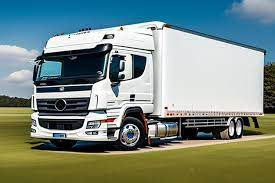

A previsão do modelo de CAMINHÃO é: ship

Probabilidade de ser airplane: 21.88%
Probabilidade de ser automobile: 21.27%
Probabilidade de ser ship: 28.79%
Probabilidade de ser truck: 28.06%


In [18]:
url4='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBQUEhcUFRUYFxcXFxcaGBcaFxgaFxoXFxgaGhgXFxobICwkGx0pIBoXJjYlKS4wMzMzGiI5PjkyPSwyMzABCwsLEA4QHRISHTQpICkyMjIyMjIyMDIyMjIyMjIyMjIyMjIyMjAyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMDIyMv/AABEIALcBEwMBIgACEQEDEQH/xAAcAAAABwEBAAAAAAAAAAAAAAAAAQIDBAUGBwj/xABPEAACAQIDBAUHBgkJBwUAAAABAgMAEQQSIQUTMUEGIlFhcQcUMlKBkaEzQnKSsdEjU2KCorLB0vAWQ2Nzk7PC0+EVFyQ0RFWDVJSjw+P/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/8QAKhEAAgIABgICAQMFAAAAAAAAAAECEQMEEiExQRNRFGGBBaHBIjJScZH/2gAMAwEAAhEDEQA/AMxloZafyUMle+fK2MZaGWn8lDJQLUM5aFqfyUMlA7GMtDLT+ShkoCxjLQtT27obugNxi1C1SMlFkoGMWoWp/JRZaQDOWiy09loZaAsZtQtTuSitQFjVqFqctQtQFjdqFqXahagLEWoWpdqFqAsRahal2oWoHYi1C1Ly0apegExKR3qyGBUgDXhxptAoA0qWmJrCcpdHbhQil/UXex7RrYf61ajEVmoMRapYxlcc4tuz0cOSSpF1v70TMDVQuKp1MVWelmmpE2wo6h7+hRTC0ZndUe6qdu6MR16eo8PxkHc0e6qbu6G7o1D8ZC3VDdVN3dEY6NQeMh7qhuqlFKSVo1B4yMUoslPNTcsgVSx4AEniTproBqaNQaBG7oilLjSeQEx4WeQDIQd2yq2cX0ZgBoON6sMHsHGSAncWGYhTvIyGUHRtDpfXTlao80PZr8adXRV5aLJWlh6F4tiL7tfFmP6qmrGLoC/z5/YsbE+9mH2VLzEF2NZSb6MQUpJWulR9BMMou7TP3AqP1R+2ldHujkRRjPgkR1kcAMzSBkvdGGYsOBseGo4DhWTzkU6VmschJq9kcvZh21Iw+z5pPk4pX+jGxHvtau3YfZkMfycUafRRR9gp54WPBrDsA/bUPOekWv0/2/2OOwdEca/CBh3syL8C1/hU7+QOMte0fhn1/Vt8a6BtaHFBXMCxOVQlRIZGLOL2UC4AvprfiapOju0ceQXlw6XLWCIUjupFwzBpGsQQRfic3DS9ZvNzNV+n4ddmD2hsHEwayxMo9YWZfrKSB7arildK2z0VfH53xDyQMGVYlRkcBAik5tNbuWNgR6IrNT+T/Exj8HMsviWRvqtmX4itcPONupL8mOJ+nJK4v8GZyUMlT8ZsjGQ/Kwtb1rXXxLpmX7KgriV5gjvtmH6Nz8K6o40X2ccsrOPQWShkp6Nlb0SD4HX3UvLV6jPxNckfJQCVIy0eSixqAyopxDRhaO1SzSNoWJDS1lNM2o7VDijZYkiXG9+JqQHA51Wg0rMah4ZpHGosPOKFVuahR40HnZciOlCKr49H5e1PefdwpB2HNe2UG3O4t7Kjyx9j8Ml0Uu7ot3VhNhHT0lK+ItTJSqU7JcCGUpDLUxko8DgjNPHGL5WkXORyVbuwvyJVGHtpudKwWHbSQ5s/o1iJ1DqFRCLhn4EcLhRr38ge3W9WsXQG4tJiWOpPUQJ1dbKbk8uYtw5VtDKo0zKO64Hwot8O8+CsR77WrhljSk36O+GDCKXv2Zj+RuHV4wFdwWOckgqFCNa4zAi7FeAbgdBxFrH0egT0AY+OqZUbUW9NVDdvPn4WsTKfVP6I+00WdvVHtb7lNQ5yfLLjhQjwiONkwZgxjDML2Z7uRmFjq5PED7e01NijVQFVQoHAAAADuA4U0GY+qPYT+0U3i8UsSNJLIqIgJZyAoAH0iak0HNoYxYYpJWBIRS1lBLNYaKoGpYmwA7TXOuj3SLak+czRzRXc5Y0wpU2Oou8iMDbhw5VExnldjL5YcJJNZrK0kioDyuFVDx7+2pO2PKJi8Isby4SICQFhGJGzbvkSwuASOVjanQjc9G3xJwynFG8hZz6IQ5M53eZB6LFbEjle1Wheq1dqMyK/m8wVlDAhY20YA8FkLc+ymjt2EE595HbiZIJkX67oFPvpDLYuDpoe7Sm3wynm6/Rdx8AbfCoWG2th5fk5opO5ZUb4A1KsOy3hp9lAhl8LMNY8S1+QkjR0/QyMfrVDwFxIVPEORpw48qss9VQe2LI7Sp/RH7aALuXgfH9gqGamScD4/sFQzTBgBqFjNk4eX5SKNz6xUBvrCx+NTRR0WJqzI47oDhZPQZ4zyvaRR7G636VUWK6DYuPWORZR2ZrMfzZLgexq6XQq1iSXZnLCjLlHGsVhMVD8rAwHrZWVfraqfrUwmLQ8br4jT3i4+NdtvVbjdhYWX5SGMn1gMjfWSxraOZkuTGWVi+DlaEEXBBHaDcfClZa2GN8n0DEtHI8Z77OPYRlb3k1TYrobjY9Y2SUdmYX9z5T+ka1jmIvkwllZLgqMtDLRYlZoTaaF077EA+GYAH2MaQmMjPFsv0gV+J0PvrZYkX2ZPDkuhzLQy04BfUUMtVZFDWWhTuWhTCjpQx9LXaAqkzmlrIa8zQexqLzztTVdicHG7ZhYdoGgNMpIOYpQkUm3D3/cdaSuPApVLkYxuFQA2Fu8cPbWZwPTrDYPEYhJszoFiyKiIxaQZi5LEi1gVFr9tDpvC8gWPeCCAXZ5CzuXyrdgyRqAqL+UwudACbVhdhdHfOUkySkZGG7aSJgjrdw12UMFYWQ2zH0iOV6bk2tJFRi9XB0DEeWbDjSPCyt9J0T4Lmqsl8sOJb5LBIPpPI/6oWs6/Q/GLwljP0ZGH2oKqtqbBxUKZ5B1LgFg6OAWNhexuNe6pcGuUNY0XsmjUS+VDarfMijGuoiPYbfKOedqqJfKBtZr3xmX6IgW31VvWViYKblQw5g3+BGoNSdobQMthkRFBvZV1vwuzHU0aTSyfiOk2Nf08dKe4Sy29y6VV4jFlzeSR5D2sWb4saj5aPJVUK0S8JtIRMGVAxGozE29oGvxrb7L2Zi9qYvDSYwhYZAWCCyXgivmIHFUJGW5Nze/fWAhQX4V2jAyLEXZrEYXZ+DjZSyqG3zLJIhLWAzBWHt58KmSYlJXSLJ+kuFGJjWPEYJYSoDqJpN4DZ75HRco13fE8A3aLabDzI/ycpYnhkxGf3CRyPhXnB21LquViSRlGUgnkCOHG1da6A9E48DjpE3sc8gjRmBjZGiBv1o2IYMTfKbFTY+yiUNI4yUi/wBsbXwccm5xcqByoa2Jw6OhUmwIdUVDr+VzosNhMHKv4AwsO3DYiXD+4QsRWa8tEd0gbsWUe+TD1yMJY34Ht5++nGGpWKU0nTPQGP2diQjbiXGq4UlV3uGljJA0BMv4TXhfvpzYDuzK0kjSNb02CBiL3HoKq6X7KY8lzyHZsTSMzEtLYsSxyiUqBc620NStlplkI7GYe42rNqikadj1T4moxqQvofnH7ajtTGFQoUKADo6IUKADoUVCkAKKjoqYBHhbl2cqqcZ0bwknpQqD6yXjP6Fgfberek0WJpMxGN8n8fGCZkbsfh4FkykDxBrK7LZ3hRpPSIJOhBGpte4Gtdeka1cqjlUBQTYkL8SB9prpwG922ceZS2SQrJQovOU9b4H7qFdPkj7Obxy9GqvSlY04kRNWeDMcY4DN63P2dlcUpJHoRi2VscMjHRT4nQe80JcNIouV09hq6mxKkcagTYrvqVJstwXs51jNqPJtCSBmvEJIc6N1k3cMLyygq2nWNgTbkO6rTYWmGjJsC65yAABmkJc2A4atWO3mbG7RlBANpkS9/SkkyA6fkB60w2qojDKhWNV0Z2KEooADKERxY8rkX7LWvth0t2ceZTlUUW7MO2s90zf/AIUjtkjHuuf8NNt0niFtIh23xDXGl+CxNpwHGqPb23VxCCMZAA4a6s5vZWUC7AHmfmjgO2rlNOLRjhYE1JNoyxWiC1J3f5Q9iufsFFlA4t+jb7TWJ37jGWiy1ICqeBY+BSnBD+S3tZf2Uth7j2zdnSO8V0cLK4RXKsEYk2srEWJ8Oyug9Ipw2Cx8o4SbRjhXvSBS6W/jlVX0XxBiid5GQqMpSN5VXM8ZDRC4VpGswWyDsFTtubPmTo/E8kbqzY0zSAghlR0kRGcHUXOTj6wqXLdD08v6MKxt1jwWzWHdrXXugOMfFY7F4wRusLxoiOykZjmBsO2wXl2jtrkOwscIsVDKy5t26vlsTdl1TQanrZa670M6T43Ey4h8T1MOqjIzoIwGzCyhyBm6uYm97aUTlaJw46diH5Y5PwUR7BL/AHmHrkST9vw1rq3lCVsescWDVsSwEmYxAvGt3hsGkHUB6j8+VJ6EeTKSKVMTjco3ZDJApDMXGqmVh1QAdbC9yBryMxk0jRwT5OgdGMAcPhMPCws0cKhx/SMM8n6TNTGF+Wcf0j/rGrZX63eQ32VTYY/8Q/02+2pKNKvoe0/bUdqfT5P2t9pplqAE0KFCgAUdFQoAOioUKABRUdJoAFETRmiagCNinsjHsVj7ga8/PtCRkIY2DKuYngQRqFuePcLV3vaTfg5P6uT9Q154giksoKKy2FrG/EcAbmx9lvfrE20uRxSZO8/bnJ+l/pQqLlH4ttdeQ469poVgVR2nPTbeJow6k2DKSRewYE2HE2BoMhr0DnsJe9jTomUUwyU06UUFmH6X9GcXvjLh1zRYgs1oyEAZLK4kUsBmub355idDeq3E9GZChyiYPy3s+FVfaDJcfxx4V0XpR0OmxuEw0alImieZmEmcaORawVT2c6zSeSTE88RAPBZD/hFTs+WWrXCMavRnEA9aXDJ9PG4b/DIanYbovI5suJwbN2JM0je0Ro1atPJHNzxkY8InP+IVdbE8n0+GDqmNjs9r3w5JFuBW76Hv0obXTCm+Uc3GxYvn7QwgH5AxL6eyKmTsTCXu20Y/zcNiz9qCuiJ5IYuLY2Q9to0H2sakJ5JcGPSxGIPhuh/gNTaBJnM12Ngb/wDPv4rhJL+zNIK0vRHodhcdKyR4qcpEFaQmBI9DcBUYyNZiRfVSAAe6tlH5Ltnji07eMqj9VBWg6LbAw2CaYQKyod2GLMztnVWY6nlldOFDa6Gk+yZsfozg8GLwwqHtrI3XkP57XIHcLDupnpUqvgsSHj3q7pyYw2UtlBYWbkQQCD3VfRyo6BlYMp4EG4PLiKZdU1B9xtYioKPOmD2KMS6xRYbd5jbOxcO2lyFzyZeXHKLd/Cu4bP2Dg4AojwsCsoAzbtS17C5zEX41ik2Q2H2rDED1DIrxNrrGLtY94Csp8L866Rux6w9xrSaSqjOEm7sPfk6a+A4D3aUQPbVfidvYSKdcO+IjWVioEZzZiXtkFgOdx76sGUesv6X3VBYlVQG/WvY8xbge6qPCn/iX+mau1jN/STnzPZ3iqPBg+cyX9dvtoA1EfyY8W/WNMtT0fyY8T+saaagBNFSqKkAVCjoUAFQo6KgAjRUqiNMBJompRpLUAV21T+Bl/qpP1Grz8mEYITkcDQlncDKQbE3B1W99bdvs7/to2gl/qpf7tq87tictkZXsNFu5UWIGh0F+XG1gaiab4HEk7110z8O/7lP2mipYSAelJIp5jKGsfG4vR1lt6LFqBcce88PhU9dv4kLuxiJMoBUANwB42I1v38uVaNug0P4+b3J+5RN0IitbziX6qfu1KzEF2LQykXpTi1ygTFgNBmVCT4llu3x41Lj6WYiYrGRGM8iJnVSGszAEDrEa34/wJp6FRWt5xJoLein7tHh+iUcciSb+Q5HR7FV1yMGtpbjb401mY/5CcPo0fSTb+IwWGjaBVbPjMerAxlzpiJGXKMy20zVnP94O0rFjFYAEkiAaAC5Or1I6fbZwc2EMKyuJY8W85TdOjiOUuWsbFSAZAL31tWCjngsbYmdTY2N2sDyvYcL11qmiHZqf95+MJAFrkgAbpOJ0A1NNHymY0SBWlul7M0cUII7cgZSGI7yL93Gs1h8UyurHFK6hgSjvIAwB1U3BsCNKZxOz0DdSaMwm5zNImdRr6SA5i44dUEHkbGhoEbHbHTbHQylPOpJBlR0dI4ArxyIHRwDGSLhhoeBuOVQ4eme0pDZJcSTa+ghXTx3QrPtO3BMSI4wAFTOxYAC12yC1zqTY21pKTJrvMXI3YFMnHvLCnQzRv0j2oNWlxCjmTMgsO2ygV1ryfmSTZ0UkztI8xkdmc5iVLlY7k8eoiV5/kmgAOV5GaxsXLWBPMgCu37N6fbLhw8cUckjiKNEXLDLqEUL6vdSl9CRqdiaQnvmxRHg2JlI+FqRjdorG1isjEi/Uilce0xowB7jWOi8osSRrGmFnfKoF8jrc8zqnM3NWOxtuyY6MTRYN2RiwDtOETq6G9rG9wfm9lSOy4adXyzGHrR5lRnVkkUPbPlDoCFNlHfalSTTZcwjiRPWkmKX8AIz9tIUY21tzhVHY80je+0evvpnpNtrzHDiaQK87dUBdAWOuRC98q2BJY8lY2JsKKAyk+w5H2oMWyYEoHRs/nEm9vHGoUjr5eKgejwHCtUcVP6mG/wDef/lXN5vKfj2Js0CDW2WKR2GnrEhSfZarPof5RcRJikgxLq6y9VHEYRkk+bexIKser23I76bTA20WLkzDOsKi+pGJVrDtsUF6g7HmEkrOCCGYkEG4IvoQedXT49h84++q7Zpzzu3ax9/A1IGki9Ae37TSCKr9sS4lIozh916f4Te5/k7m+TL87x0qQ+JhLKd4t1Jy69osfgaLKrYftRWpnz6L8Yvv7L3/AFT7qMYyO9t4t+y+vG320CHbULU0MVHYddeHb3a0rfp66+8UDF2orUQlS/pry0zDtI/09lHnU8GX3igAWorUrMO0e+hcdo94pAIIpDCnhbtFFkpgUu39MNP/AFMv921cA3pT5smnKyFVHWtaw6p9l69B9JIz5niD/QS/3bV5w/2pYLaNQVGUEljccwQCBxpNWCJYb8nC/nZQ3tsRQqrlnjLEiNQCeGZ9PjQo0hZ2s41PUP12pDY1PUb671nTtFu0/wAeykNtBvWP8eyvH0s2NA2OT1G/tHpKY+PMM6MFzDMd4+i36x916zrbQb1m/j2UmPFyO6oGclmVQABcljYAX8atQ3JZ1Tbc2EGzZGSRI4WVUMsapKmWRgnXtq6HN1tb2vreudDZGznGu0sJbvwRX7ZK1sfRqRosbhDGU30CqkhtkaSMs0ZzDW924MAwC9gFcZx+Cmgk3c6SRPe2Vsy31tdTwYd4uK9hbbIwZuD0X2ceG1MB7YkH/wBwoDongf8AuezfqJ/n1znEzSJI6B36rsvptfRiNfdUhXkNvwja2/nG5+ymrGdAHRPA/wDdNm/2cf8An0f8lMBy2ns2/K6Rge22Irm3nz2vmk0/pD91St7bUux+kxIoA6TsvoVDO+7jxuDlWxLjDJGZFThcEuQupAuQeNdSh2Ph1iWLcR5EUKqsqtZVFhyOvfXL/J9hpMPszG47KVklQph788qkIy9xkcD8ymhi4yqhjjJXJC5nxIZWcFS/U3r2GVk0Kj0x6wFG4tjo+I6MbPvdolX890HuDAVSYna2BwRaKIYQI34QgyOxztoxyxxyccoPEa305mu2P0Vw+JkUmLKqRHeEFS2d2QxrfJbNkV2I4gMnrVIxvRXBYeRkEJYMquS+KaMZmLg8B+SOFZylPg2woYWzk2v9Ittg7XGLa8CwFFazPuJgunEKzqgLW7L8RWI8q+PMuIMSsF3YKAk9VblWd2tc5tMoFuDMfDe7E2rhYEETNh4URTktilkJ1uwYsAb3N+d9eyuJ4yF9oYjEYnOI4FYvLKQSBchUAUasxGQBdNT304puiZOKbrj7KOTY7H0ZY5D2ZmBP1wB8aawWaGZQwKMGUg8CrKbowPjzFa3aXQcRRwyLiSvnAG530YjRyyhgpdHfdsQdA4A7xWaxSSAth5lKvGSoDaMjjl9E+7UGqaJi6ZdS4jHec2fzuUPcxRhp2Ei66jIyMR4a9taPZPlEkglEUkG7CnKw3EmdLdqGW9xppTPRbCYvGIY4GgBVI3d52kJs2ZCiKtxbNGSb8276u4Oh8iYuKLGyQyxyhyFSOJFzKrMAWZC1rK3Cx1GvGpjukViKpNIsdpeUfZ7QiPfSKxUgssDKQSLZlD3HHWxJqjj6dYJHvv8AEyABBlMUQF1QqxJuL5icx7wKXtfybYWJ1/CgJLIEU3DMjPcqCBlupIy3HC4vpcjLz9HsIBwcm5Fsrq2nG5Lkcjy7Krw6t7/clY7jt/BpE6f4MKHHnJCu2YmOHrbwPlQgMOqvK2vUFyb0cPTfDkKyQYxwJC2bcxtmBBG7vmPVvrprcVhsdh4ohKHjO7XFRjIjkHLupCLM2Yi9wdb9l+dW0IibDrkhIUvdVfHKpC5dGvyBJIy916jSkVrb2NGvTCIC3meMb0jcwxg9cnkumlwO/KL3oN0tS5IwWM1CC25jsMpubAqfS53v3WNZueGIql1gGVLdfHPp13a11PW9K9++3KmoI8MrqzDAjKwN/OsUxFjxABsTTpCtmq/lcp/6HEcQdUQcHz8++/vvxpSdJ1N7YKcaL8+JQMrls3HmWHurG4c4VLkvggSrjqLjnPWRhxZjprr3XpcWMwahhvML1ly9XC4i3pKbHM2o0+ylpQambXYvSBcVLJGmGlBhzNIXljWNAuZcrNlIFtdfySSbA0T7ejGHefdqIUk3YlMxAd8gF4gsJL2yseAsSTa1R+ju1MPLBNh4yss0pV5N3A6IYoyGtJmJzXYsp7RIR21X7E2e643EYcLaOJt6sYX0ZJowvDkLArbsY0aUPUwYnygYdW/5aSxuwZJlKkMwNxmS+mUixta7Ai/Cy2h0uiw+RpMPIVexVkljZdNSpJQHUWOvs51gto9HZjJKsaAiKaRMuYAgdVgADbQZqu8ThDJsy0qlXiQkAkggpcA6GxunbfjWU5KLVPumNNm2TbEL5WKS5Cvob0ZHVh86yXOluB5eN8//ALA2f+Jt/affUHovj8+FQFrMl0I+j6P6JHuq2OJPrfH/AErixMSak1fBXJG/k9s/8UP/AJP3qFSPOvyj/HsoVn5Ze3/0KRWGHuFNtGO6rU4fuFIMHfU6x0VDKO6nMDg99KkQbIZGChitwpOlyNLgeIqc8XfVdiMSqalylvnZJBbwYW18K0hPclo7D0e2bLArrLLvE6m7AMjBCpYsVL3KggxgLcgZL8zVhi8OJVyOkM6+o4B9mt/fauHR9J2GiYiZj+TdyfYwNOy9JcWts+KljB1G9wqN7Acor0I4l9MzpI2vSLYmy8KEebZzfhZMiiMxnrZWb57LYWU1UnC7DJF8JiIzyvLGvC3ACbwrGbV6XYoMFZoZkBzIzQpa9rXt81hcj299ML01ltcxYYkcAYTwPHUNpwFdMXHTunZm9Te1UdJwPQXZEyF0hxBAd0ZQz3DIxRlPWI0ZTzrQbJ6JbPiYbvBLmHovP1zcdmYtrz5cK5PgfKfiogVWONQzM7BWkUF2N2bVja5q5wPlVna4aG4Fr3l07hbdnXj7qz3b2RbaStnU+kaS7ghMPHiNUvG65kyAkkhPnFSENuPZcgCspPPjFMYjwuHUMHLFNnTHIVKZV1biwZyDa3U79KuPyqKPSwz+xkb7VFSV8rUI44eYeCxH/GKqpehaovs1WxWxkmEDzBIpSX6mRFVQGIQkMtxcAHUA68K5J5UN755EsgSRxh1JKEFBeSTS4RRyHEVsH8ruH/FYgf8Aji/zKoNtdO8FiZFkdMSGRCo6kOozZhcl72HW4EcaX4YyR0X2DhhsqbaE+Gid0ScxKwug3YsCwGjEyAjW9gNOJp/otiYsFgZSyLIzrdroGOUKQIyCCLkqXJOnXTQ6msxtfpvnwz4aASZJBlbeNZVXMGIVAzC5I43HPQ3uLHY0j5Hm3QOHazmUdZRbIrpJcnI4AAOg0GblcltJj0p8i8P0qmlkWORWZSzNlbrqrxkyRkBmOUgiwItoFAtrep8oMWuGma5kdZUdiFGcRSWRrKLaK+TwjA5Vo9mtGirJhYQ7MrJvMzNEvWW5zHqRLcfOLMeXWGuL6XbTE0qIrZo4I92HAyh3zF5ZAvIM7NYdgFVLS3cbr7JimlvybDyQlmkmkRSzxQhD1bkbyZn08Qvwq36W7TkGLhDAhkUtYrYgMsq3+BrmOxce8aSNHZSm5a2pUspZc7KTYnrnu1p/FdIJZCSzRZrAZtzETYXIFyp0uT7zWai3aRrKVU32a7aG2ZbxjKbmWMi45qcxPsAJ9lVk23JAoZsi3ubtlGh1HE99QItvx/zWChY8Gz76cHNpYqXsLm3Luqywu28RYhUgwWvzNnsH8Qd2/wBt6nwuqbFrV7Ize2cbvopX5HFJryssTKPeBes7W9GwZMVdDjQwZsxDw4hbsSSW66AXuTr3mpP+7FrAecqDrc7tjfhbQkWtr76pyjHawUZS3oxexcK0rsgk3ashzseGUENYi4vdgtTcT0dC2yTxv25jk92pB99alPJkw4Yu3hEf36dHkvkPDFsf/Af8ymsXDrcmWHiXsYXG7MMSoxdHLZgQhvlta1zzvr7qm9HtkLiGcM+QIA1lAzMCSNDwXUDWx41t8N5LnBu2Izi1srQm2vMWlBvT+D8mjQtnXGFTlKnNGliDrY/hO0A+yoliR6ZcYSX9xO6MrDDioIo1REljxMYJIBL/AIEgsx9NjlY27jbsp3Y3SXDjb2PLyRpG4jtIzBVJwyZXAY6E3LH82oOK6Exum7lxwZbhhliXMCNNLOe1uXM91FB0G2cg60k8mmXkosTe1gg568ahY0Iqmxyg29jGY/b0rYiaaMsEnmlkUZb3VnKqdR2KPdTuH2xij/Mu/hE5/VFdVwOIggiSKNHCILKLjQceN78zTjbZHKP6z/6VzzxcKTtjUK7Oc4WedzrhZQDz3bj35h+2rBMFIfmMO7T9lbB9syckjHsvTL7XnPBlH0VH3VzylDoqjNf7Kl/Fv7jQrQ+fz/jG99CouP2FFWUHZSSg7PsqUMvZR51rCxkIp/H8CmMRE5U5VUm2ma+W/f3VaZx3URt3U06CjEYvA7RI6pjUdkbBfidfjVN/J/G3J3LEnic6EnxObWumMB22psoPWrshnZR4SIeGnyc3bY2OAythZWHZkLD4VAfYWKB/5Wcf+J/3a6ta3AmjMrjgzD84/fWvz2+UJYSXByB9nTL6UUg8UYfaKX566jKBkHYLgk9pPEmuujGyDhI31jRNjpDxbN4hT+sDVRz9dCeEnycdbFOeZ99IMrHma6+8oPpRRHxiiP8AhpBMf/p8P/YRfu1Xz0+Uw8SRyG5qYuycSRcQSkHgRG5HvtXUlmiH/TYf+xj+6n4dpLGbxwwIe1YlU/Cl82PofjRy6PY+LIt5rN3EQv8Au1LweDx8TExwYhSeNoZLNbhmUrZvaK6YekEvavsQUk7fn9cjwCj9lL5q9D8a9mNmm2xMm63M4SxGkBQ2PEBioIB5gWvT2A8nE8qAs5ia3WWSO2vYpViSPECtUdszH+cf3/dTT7RkPGRvaTUvOvpAoIhQeThVTLI8WosXWSSNj45s6/o0pfJxglIbzxtDexCMD3EW1p44g9tFv6yecl0h0vRa4XYGzY/TET/RidT26kNb4VbYfH4OIWjVrdgzW9zNWU3nfR5x21EszNjNXJ0gi5RE+JA++ozdIPViQeNz91Z3eCj3tQ8WfsdsvW2/LyCr4J99NPteY8ZG9lh9gqnM5pBmNS5yfYWWr41z6TsfFj99Necr/Aqt3p/gUW9qaYrLTzvsvRHG93xqr3vdRiUUaQssvPO6h52fVFV2+HfSd73GnQWWJxR8PdRNN2t8art53UWcdtFAT94O2hVfmHbR0UA8J+8UPOPyqqQ9HnqtIrLQ4rvpJxPfVbehelpQWWBxXf8ACgcV3mq8EUdxRpCyacVSfOqi3FC4opDJXnRojiDUbOKGeigJBlPbRFz20xno81OgHhRg0xmoCQUqAkXow1RxLRbyigJObvo7iouehnPbRQEqh7ai5qLNToCWSO2izCouajvRQEjPQ3tR81GHtrRQD++ot7TDPrek56KAk7yjz1GzUktRQEkuKIuKj3NC9FASDIKIyUxehegB0yUWems1C9MBeahTV6OgBq9C9ChTIBehnoUKoA89DPQoVIwF6AahQoGHmo81FQoAMtRZqFCgAXog9ChQAeaiz0KFAAz0M9ChSAUHow1ChTAMGjDUKFIA70C1ChSGJvRE0KFMAr0WahQpiDD0M1FQoGHmoZqKhQIGcUWehQoALPQoUKBn/9k='
previsao(url4,'CAMINHÃO', model,32,32)

# Modelo Pré-Treinado

In [19]:
# Definindo função

def treinamento(model):
  # Mova o modelo para a GPU, se disponível
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  # Definir o otimizador e a função de perda
  optimizer = optim.Adam(pretrained_resnet.parameters(), lr=0.001)
  criterion = nn.CrossEntropyLoss()

  # Definir o número de épocas de treinamento
  num_epochs = epocas

  # Crie listas para armazenar as métricas de Loss e Accuracy
  loss_history = []
  accuracy_history = []

  # Colocar o modelo em modo de treinamento
  model.train()

  # Iniciar contagem do tempo total de treinamento
  start_time = time.time()

  # Loop de treinamento
  for epoch in range(num_epochs):
      epoch_start_time = time.time()
      running_loss = 0.0
      correct_predictions = 0
      total_samples = 0

      for images, labels in train_loader:
          # Mover dados para a GPU
          images = images.to(device)
          labels = labels.to(device)

          optimizer.zero_grad()  # Zerar os gradientes acumulados
          outputs = model(images)  # Passar as imagens pelo modelo
          loss = criterion(outputs, labels)  # Calcular a perda
          loss.backward()  # Retropropagação
          optimizer.step()  # Atualizar os pesos do modelo
          running_loss += loss.item()

          _, predicted = torch.max(outputs, 1)
          correct_predictions += (predicted == labels).sum().item()
          total_samples += labels.size(0)

      epoch_loss = running_loss / len(train_loader)
      epoch_accuracy = correct_predictions / total_samples
      epoch_end_time = time.time()
      epoch_duration = epoch_end_time - epoch_start_time

      # Ao final de cada época, adicione as métricas à lista de histórico
      loss_history.append(epoch_loss)
      accuracy_history.append(epoch_accuracy)

      print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.4f} - Time: {epoch_duration:.2f} seconds")

  # Calcular e imprimir o tempo total de treinamento
  total_training_time = time.time() - start_time
  print(f"Total training time: {total_training_time:.2f} seconds")

  print("Completed training")
  print('')
  # Plotar gráfico de Loss
  loss_fig = px.line(x=list(range(1, num_epochs+1)), y=loss_history, title="Loss Over Epochs")
  loss_fig.update_xaxes(title="Epoch")
  loss_fig.update_yaxes(title="Loss")
  loss_fig.show()

  # Plotar gráfico de Accuracy
  accuracy_fig = px.line(x=list(range(1, num_epochs+1)), y=accuracy_history, title="Accuracy Over Epochs")
  accuracy_fig.update_xaxes(title="Epoch")
  accuracy_fig.update_yaxes(title="Accuracy")
  accuracy_fig.show()

  print('')
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

  # Coloque o modelo em modo de avaliação
  model.eval()

  # Lista para armazenar as previsões do modelo
  all_predictions = []

  # Loop de avaliação
  for images, labels in test_loader:
      # Mover dados para a GPU (se estiver usando GPU)
      images = images.to(device)
      labels = labels.to(device)

      # Obter as previsões do modelo
      with torch.no_grad():
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          all_predictions.extend(predicted.cpu().numpy())  # Mover as previsões para a CPU

  # Converter as previsões para um array numpy
  all_predictions = np.array(all_predictions)

  # Calcular métricas de avaliação
  accuracy = accuracy_score(filtered_test_labels, all_predictions)
  precision = precision_score(filtered_test_labels, all_predictions, average='weighted')
  recall = recall_score(filtered_test_labels, all_predictions, average='weighted')
  f1 = f1_score(filtered_test_labels, all_predictions, average='weighted')
  conf_matrix = confusion_matrix(filtered_test_labels, all_predictions)

  # Imprimir as métricas
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")
  print("\nConfusion Matrix:")
  print(conf_matrix)

  # Gerar o relatório de classificação
  class_names = ['airplane', 'automobile', 'ship', 'truck']
  class_report = classification_report(filtered_test_labels, all_predictions, target_names=class_names)
  print("\nClassification Report:")
  print(class_report)

  print('')
  previsao(url1, 'AVIÃO', model,32,32)
  print('')
  previsao(url2, 'BARCO', model,32,32)
  print('')
  previsao(url3, 'CARRO', model,32,32)
  print('')
  previsao(url4,'CAMINHÃO', model,32,32)
  print('')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 48.1MB/s]


Epoch [1/50] - Loss: 0.5424 - Accuracy: 0.8000 - Time: 5.92 seconds
Epoch [2/50] - Loss: 0.2990 - Accuracy: 0.8955 - Time: 5.68 seconds
Epoch [3/50] - Loss: 0.2273 - Accuracy: 0.9207 - Time: 5.45 seconds
Epoch [4/50] - Loss: 0.1772 - Accuracy: 0.9386 - Time: 5.65 seconds
Epoch [5/50] - Loss: 0.1485 - Accuracy: 0.9486 - Time: 5.46 seconds
Epoch [6/50] - Loss: 0.1100 - Accuracy: 0.9628 - Time: 5.60 seconds
Epoch [7/50] - Loss: 0.1043 - Accuracy: 0.9636 - Time: 5.48 seconds
Epoch [8/50] - Loss: 0.0764 - Accuracy: 0.9746 - Time: 5.50 seconds
Epoch [9/50] - Loss: 0.0761 - Accuracy: 0.9741 - Time: 5.57 seconds
Epoch [10/50] - Loss: 0.0629 - Accuracy: 0.9792 - Time: 5.43 seconds
Epoch [11/50] - Loss: 0.0498 - Accuracy: 0.9833 - Time: 5.62 seconds
Epoch [12/50] - Loss: 0.0523 - Accuracy: 0.9823 - Time: 5.44 seconds
Epoch [13/50] - Loss: 0.0503 - Accuracy: 0.9838 - Time: 5.64 seconds
Epoch [14/50] - Loss: 0.0482 - Accuracy: 0.9830 - Time: 5.44 seconds
Epoch [15/50] - Loss: 0.0444 - Accuracy: 0.


Accuracy: 0.9062
Precision: 0.9065
Recall: 0.9062
F1-score: 0.9061

Confusion Matrix:
[[913   9  56  22]
 [ 16 931  16  37]
 [ 51  18 912  19]
 [ 37  75  19 869]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.90      0.91      0.91      1000
  automobile       0.90      0.93      0.92      1000
        ship       0.91      0.91      0.91      1000
       truck       0.92      0.87      0.89      1000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000


Previsão de AVIÃO


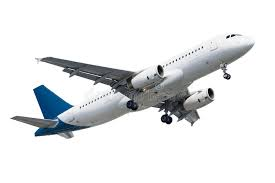

A previsão do modelo de AVIÃO é: airplane

Probabilidade de ser airplane: 95.90%
Probabilidade de ser automobile: 0.18%
Probabilidade de ser ship: 3.00%
Probabilidade de ser truck: 0.93%

Previsão de BARCO


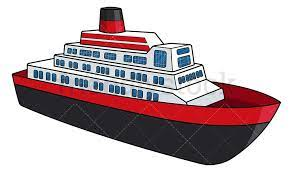

A previsão do modelo de BARCO é: airplane

Probabilidade de ser airplane: 95.29%
Probabilidade de ser automobile: 0.21%
Probabilidade de ser ship: 3.42%
Probabilidade de ser truck: 1.08%

Previsão de CARRO


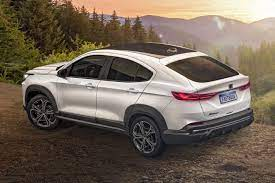

A previsão do modelo de CARRO é: airplane

Probabilidade de ser airplane: 95.48%
Probabilidade de ser automobile: 0.20%
Probabilidade de ser ship: 3.30%
Probabilidade de ser truck: 1.02%

Previsão de CAMINHÃO


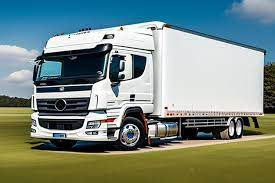

A previsão do modelo de CAMINHÃO é: airplane

Probabilidade de ser airplane: 95.65%
Probabilidade de ser automobile: 0.20%
Probabilidade de ser ship: 3.14%
Probabilidade de ser truck: 1.00%



In [20]:
import torch
import torchvision.models as models

# Modelo pré-treinado ResNet-18 do ImageNet
pretrained_resnet = models.resnet18(pretrained=True)

# Substituindo o último layer para se adequar ao número de classes da sua tarefa
num_classes = 4
pretrained_resnet.fc = nn.Linear(512, num_classes)

# Mova o modelo para a GPU, se disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_resnet = pretrained_resnet.to(device)

treinamento(pretrained_resnet)

# Aumento de dados (data augmentation)

O aumento de dados (data augmentation) é uma técnica amplamente utilizada para melhorar a generalização de modelos de aprendizado profundo, especialmente em conjuntos de dados de imagens. O PyTorch oferece uma maneira conveniente de aplicar aumentos de dados usando a classe transforms do módulo torchvision.transforms.

- Elastic Transformations: Essa técnica aplica deformações elásticas à imagem, simulando distorções naturais. Pode ser útil para aumentar a robustez a pequenas variações na forma.

- Random Erasing: Essa técnica envolve a eliminação aleatória de regiões retangulares da imagem, forçando o modelo a focar em partes diferentes da imagem.

- Cutout: Semelhante ao Random Erasing, o Cutout consiste em mascarar aleatoriamente partes da imagem com um valor médio, incentivando o modelo a aprender com informações contextuais.

- Mixup and CutMix: São técnicas que envolvem a mistura de duas ou mais imagens durante o treinamento. Isso pode ajudar a regularizar o modelo e melhorar a generalização.

- Gaussian Noise: Adicionar ruído gaussiano à imagem pode tornar o modelo mais resistente a variações de iluminação.

- Augmentation Combining: Combina várias técnicas de aumento de dados para criar um pipeline mais complexo. Por exemplo, você pode aplicar rotação, seguida de um recorte aleatório, seguido de uma inversão horizontal.

- Transformações Geométricas: Além de rotações e recortes, você pode experimentar outras transformações geométricas como cisalhamento, redimensionamento não uniforme e projeções.

- Variações de Cores: Além de ajustar o brilho, você pode aplicar ajustes em outras propriedades de cor, como saturação e contraste.

- Simetrias: Dependendo da natureza das suas imagens, simetrias específicas podem ser úteis para aumentar a diversidade de dados.

- Aumento de Dados por Domínio Específico: Se você tiver conhecimento do domínio das imagens (por exemplo, imagens médicas), poderá aplicar transformações específicas que se alinhem com as características do domínio.

In [21]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

# Define a transformação para normalização
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# Transformações para os conjuntos de treinamento e teste
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),        # Virar horizontalmente aleatoriamente
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Variações de cores
    transforms.RandomRotation(15),            # Rotação aleatória de até 15 graus
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Transformações geométricas
    transforms.RandomErasing(p=0.5),          # Random Erasing
    transforms.GaussianBlur(kernel_size=3),   # Desfoque gaussiano
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Perspectiva aleatória
    transforms.RandomVerticalFlip(),          # Virar verticalmente aleatoriamente
    transforms.ToTensor(),
    normalize
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

# Supondo que você tenha dados nas variáveis filtered_train_images, filtered_train_labels, filtered_test_images e filtered_test_labels
train_dataset = TensorDataset(torch.Tensor(filtered_train_images).permute(0, 3, 1, 2), torch.LongTensor(filtered_train_labels))
test_dataset = TensorDataset(torch.Tensor(filtered_test_images).permute(0, 3, 1, 2), torch.LongTensor(filtered_test_labels))

batch_size = 64  # tamanho do lote
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#### Passando novos dados no Primeiro modelo

Epoch [1/50] - Loss: 1.5380 - Accuracy: 0.2530 - Time: 2.93 seconds
Epoch [2/50] - Loss: 1.5298 - Accuracy: 0.2566 - Time: 2.89 seconds
Epoch [3/50] - Loss: 1.5386 - Accuracy: 0.2531 - Time: 2.89 seconds
Epoch [4/50] - Loss: 1.5485 - Accuracy: 0.2493 - Time: 2.92 seconds
Epoch [5/50] - Loss: 1.5463 - Accuracy: 0.2500 - Time: 2.94 seconds
Epoch [6/50] - Loss: 1.5367 - Accuracy: 0.2485 - Time: 2.89 seconds
Epoch [7/50] - Loss: 1.5400 - Accuracy: 0.2556 - Time: 2.89 seconds
Epoch [8/50] - Loss: 1.5434 - Accuracy: 0.2487 - Time: 2.90 seconds
Epoch [9/50] - Loss: 1.5414 - Accuracy: 0.2517 - Time: 2.97 seconds
Epoch [10/50] - Loss: 1.5384 - Accuracy: 0.2487 - Time: 2.88 seconds
Epoch [11/50] - Loss: 1.5368 - Accuracy: 0.2514 - Time: 2.88 seconds
Epoch [12/50] - Loss: 1.5365 - Accuracy: 0.2496 - Time: 2.89 seconds
Epoch [13/50] - Loss: 1.5354 - Accuracy: 0.2535 - Time: 2.99 seconds
Epoch [14/50] - Loss: 1.5281 - Accuracy: 0.2576 - Time: 2.89 seconds
Epoch [15/50] - Loss: 1.5464 - Accuracy: 0.


Accuracy: 0.2352
Precision: 0.3429
Recall: 0.2352
F1-score: 0.1977

Confusion Matrix:
[[206   0 166 628]
 [223   4 350 423]
 [274   0 265 461]
 [333   2 199 466]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.20      0.21      0.20      1000
  automobile       0.67      0.00      0.01      1000
        ship       0.27      0.27      0.27      1000
       truck       0.24      0.47      0.31      1000

    accuracy                           0.24      4000
   macro avg       0.34      0.24      0.20      4000
weighted avg       0.34      0.24      0.20      4000


Previsão de AVIÃO


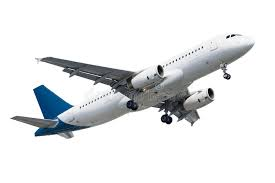

A previsão do modelo de AVIÃO é: automobile

Probabilidade de ser airplane: 25.39%
Probabilidade de ser automobile: 25.51%
Probabilidade de ser ship: 24.43%
Probabilidade de ser truck: 24.68%

Previsão de BARCO


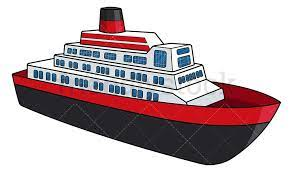

A previsão do modelo de BARCO é: automobile

Probabilidade de ser airplane: 25.43%
Probabilidade de ser automobile: 25.48%
Probabilidade de ser ship: 24.42%
Probabilidade de ser truck: 24.67%

Previsão de CARRO


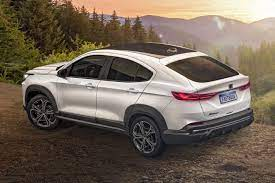

A previsão do modelo de CARRO é: automobile

Probabilidade de ser airplane: 25.42%
Probabilidade de ser automobile: 25.49%
Probabilidade de ser ship: 24.38%
Probabilidade de ser truck: 24.72%

Previsão de CAMINHÃO


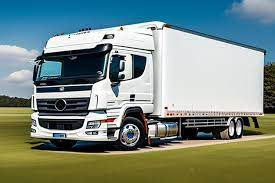

A previsão do modelo de CAMINHÃO é: automobile

Probabilidade de ser airplane: 25.44%
Probabilidade de ser automobile: 25.48%
Probabilidade de ser ship: 24.40%
Probabilidade de ser truck: 24.67%



In [22]:
class ComplexCNN(nn.Module):
    def __init__(self, num_classes):
        super(ComplexCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Achatando para entrada da camada totalmente conectada
        x = self.fc_layers(x)
        return x

# Definir o número de classes
num_classes = 4  # 'airplane', 'automobile', 'ship', 'truck'

# Criar uma instância do modelo
model = ComplexCNN(num_classes)

# Mover o modelo para a GPU:
model = model.to(device)

treinamento(model)

#### Modelo Pré-treinado

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



Epoch [1/50] - Loss: 0.5518 - Accuracy: 0.7933 - Time: 5.68 seconds
Epoch [2/50] - Loss: 0.3077 - Accuracy: 0.8899 - Time: 5.44 seconds
Epoch [3/50] - Loss: 0.2448 - Accuracy: 0.9123 - Time: 5.63 seconds
Epoch [4/50] - Loss: 0.1926 - Accuracy: 0.9342 - Time: 5.43 seconds
Epoch [5/50] - Loss: 0.1437 - Accuracy: 0.9503 - Time: 5.62 seconds
Epoch [6/50] - Loss: 0.1166 - Accuracy: 0.9619 - Time: 5.44 seconds
Epoch [7/50] - Loss: 0.0998 - Accuracy: 0.9667 - Time: 5.83 seconds
Epoch [8/50] - Loss: 0.0817 - Accuracy: 0.9710 - Time: 5.45 seconds
Epoch [9/50] - Loss: 0.0744 - Accuracy: 0.9751 - Time: 5.57 seconds
Epoch [10/50] - Loss: 0.0683 - Accuracy: 0.9769 - Time: 5.53 seconds
Epoch [11/50] - Loss: 0.0549 - Accuracy: 0.9817 - Time: 5.47 seconds
Epoch [12/50] - Loss: 0.0510 - Accuracy: 0.9832 - Time: 5.62 seconds
Epoch [13/50] - Loss: 0.0486 - Accuracy: 0.9847 - Time: 5.43 seconds
Epoch [14/50] - Loss: 0.0411 - Accuracy: 0.9858 - Time: 5.64 seconds
Epoch [15/50] - Loss: 0.0423 - Accuracy: 0.


Accuracy: 0.8980
Precision: 0.9000
Recall: 0.8980
F1-score: 0.8982

Confusion Matrix:
[[881  13  55  51]
 [ 22 884  14  80]
 [ 51  19 892  38]
 [ 19  29  17 935]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.91      0.88      0.89      1000
  automobile       0.94      0.88      0.91      1000
        ship       0.91      0.89      0.90      1000
       truck       0.85      0.94      0.89      1000

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000


Previsão de AVIÃO


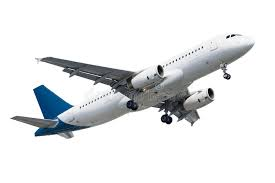

A previsão do modelo de AVIÃO é: airplane

Probabilidade de ser airplane: 98.08%
Probabilidade de ser automobile: 0.28%
Probabilidade de ser ship: 1.25%
Probabilidade de ser truck: 0.39%

Previsão de BARCO


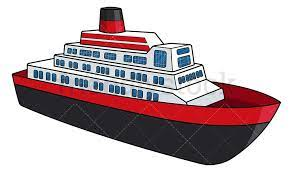

A previsão do modelo de BARCO é: airplane

Probabilidade de ser airplane: 97.89%
Probabilidade de ser automobile: 0.31%
Probabilidade de ser ship: 1.39%
Probabilidade de ser truck: 0.40%

Previsão de CARRO


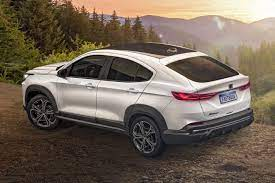

A previsão do modelo de CARRO é: airplane

Probabilidade de ser airplane: 97.86%
Probabilidade de ser automobile: 0.31%
Probabilidade de ser ship: 1.43%
Probabilidade de ser truck: 0.40%

Previsão de CAMINHÃO


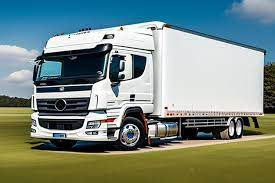

A previsão do modelo de CAMINHÃO é: airplane

Probabilidade de ser airplane: 97.88%
Probabilidade de ser automobile: 0.30%
Probabilidade de ser ship: 1.38%
Probabilidade de ser truck: 0.43%



In [23]:
# Modelo pré-treinado ResNet-18 do ImageNet
pretrained_resnet = models.resnet18(pretrained=True)

# Substituindo o último layer para se adequar ao número de classes da sua tarefa
num_classes = 4
pretrained_resnet.fc = nn.Linear(512, num_classes)

# Mova o modelo para a GPU, se disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_resnet = pretrained_resnet.to(device)

treinamento(pretrained_resnet)

### Conclusão:

As imagens do banco de dados possui resolução muito baixa por isso o modelo não ficou bom, errando nas imagens de exemplo.